# On récupère X et df

In [1]:
import pandas as pd
import numpy as np
import json
import re
import time
from pickle import Unpickler as upck
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, AgglomerativeClustering, SpectralClustering, OPTICS
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score

pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 200000)

%load_ext pycodestyle_magic
%pycodestyle_on

with open('/home/sylvain/Bureau/Sylvain/reconversion_Machine_learning/Project_3/X', 'rb') as file:
    myPickler = upck(file)
    df = myPickler.load()


# Dispersion des features

### Visualisation X et df

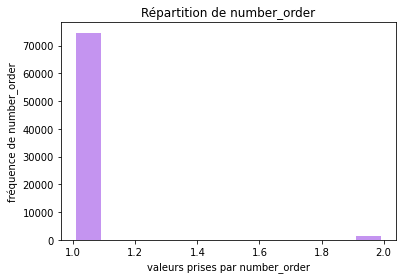

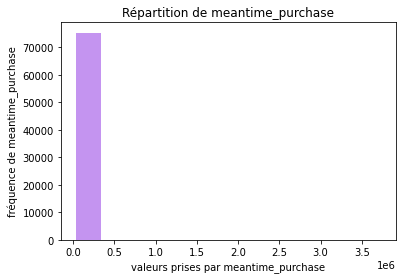

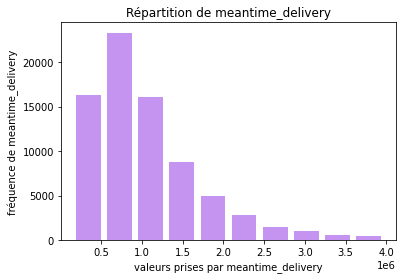

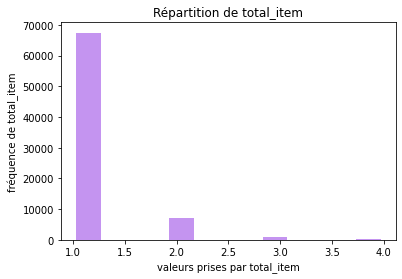

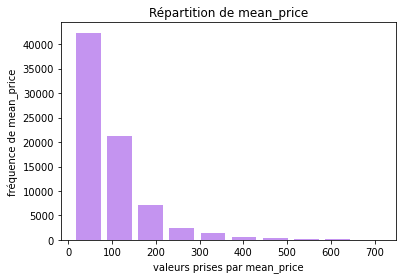

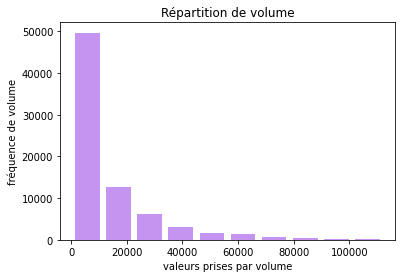

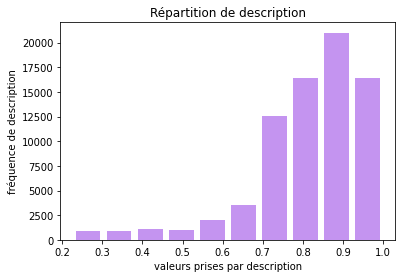

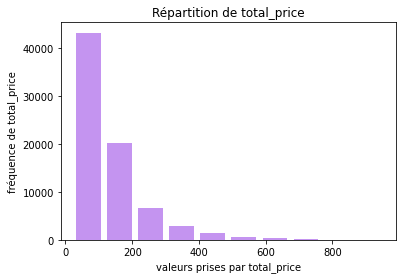

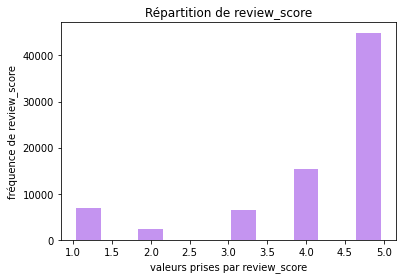

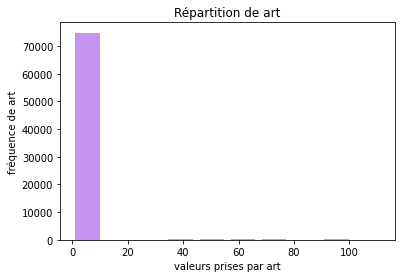

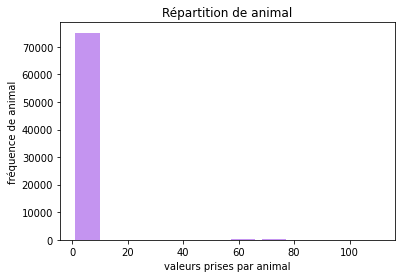

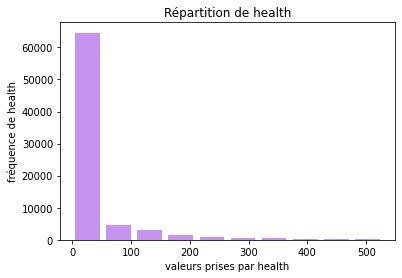

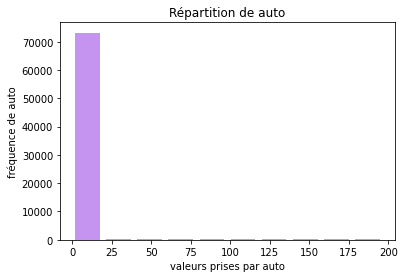

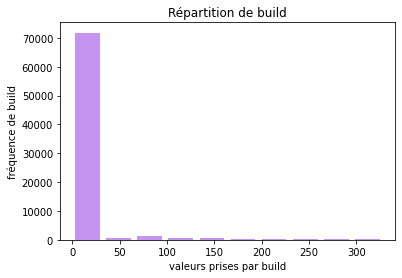

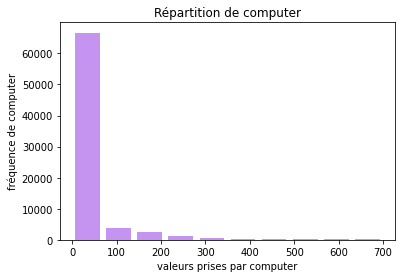

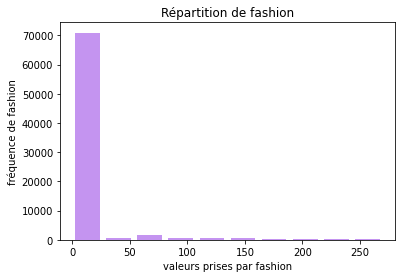

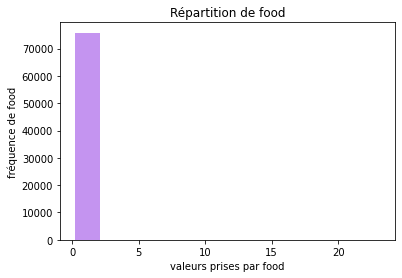

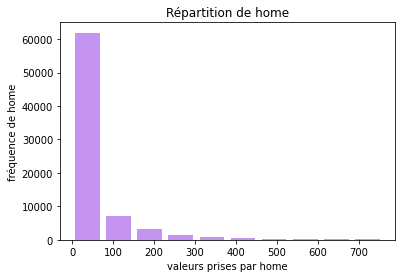

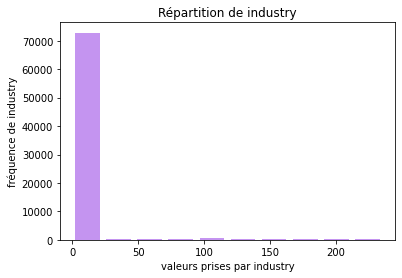

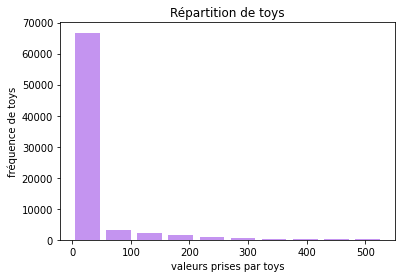

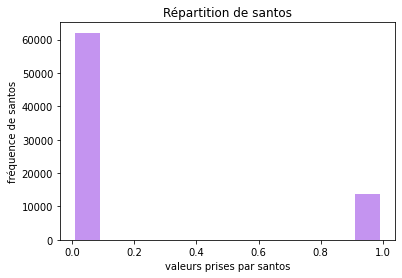

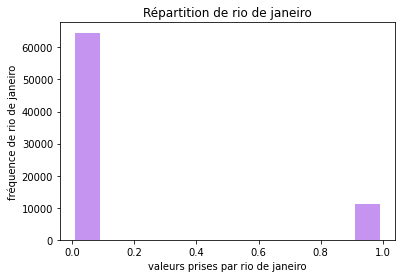

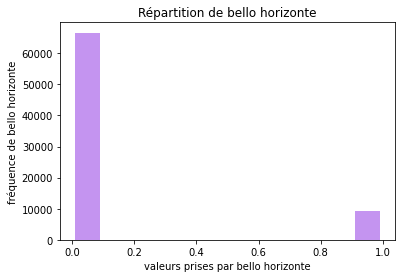

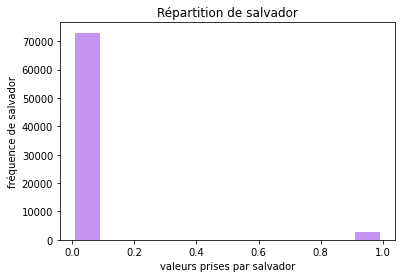

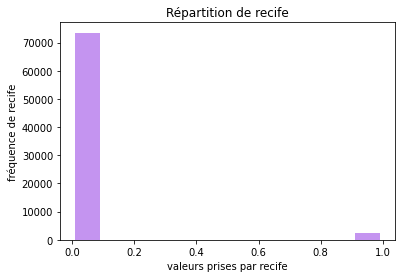

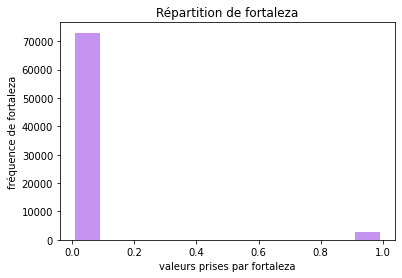

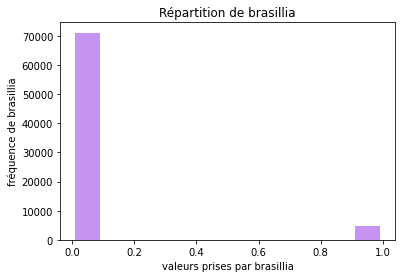

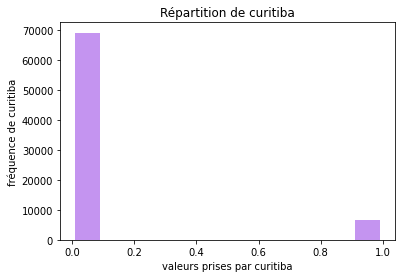

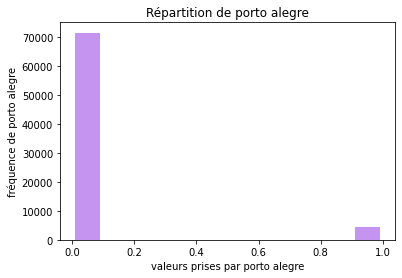

3:80: E501 line too long (87 > 79 characters)


In [2]:
# visualisation brut des données
for col in df:
    plt.hist(df[col], color='blueviolet', alpha=0.5, histtype='barstacked', rwidth=0.8)
    plt.xlabel('valeurs prises par {}'.format(col))
    plt.ylabel('fréquence de {}'.format(col))
    plt.title('Répartition de {}'.format(col))
    plt.show()

In [4]:
# On recupère df dans numpy
X = df.to_numpy()

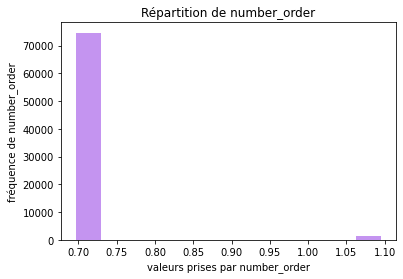

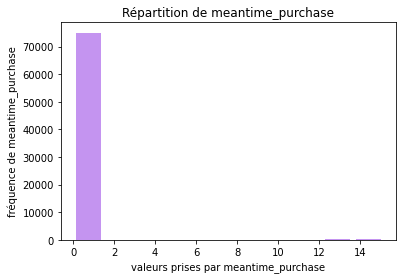

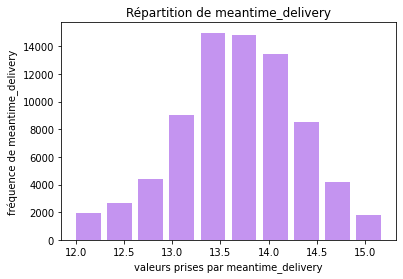

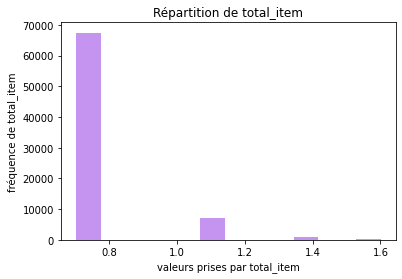

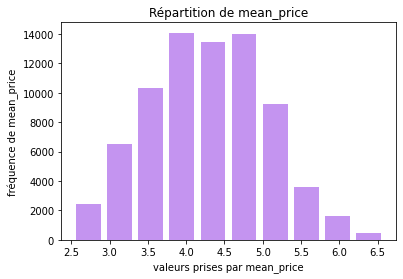

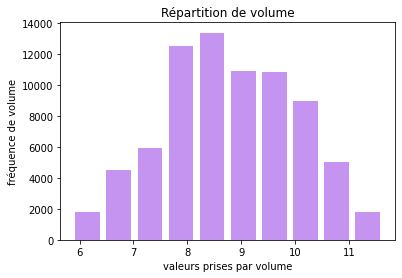

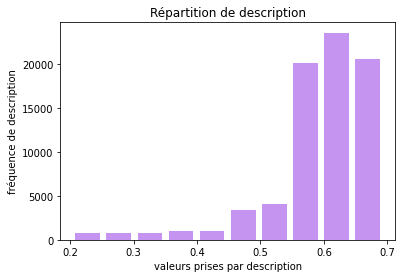

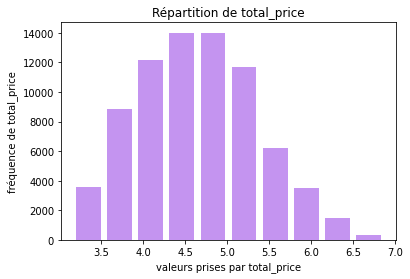

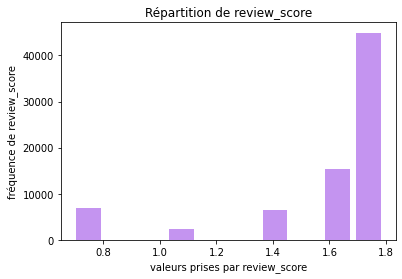

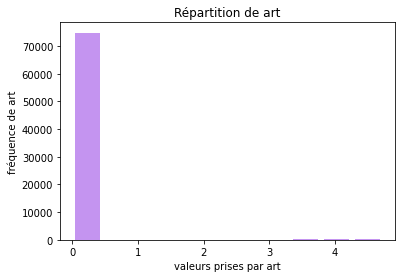

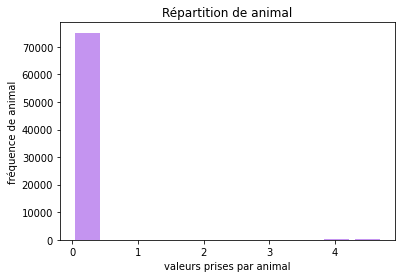

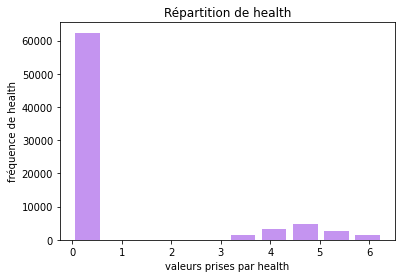

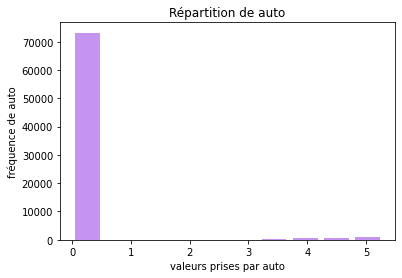

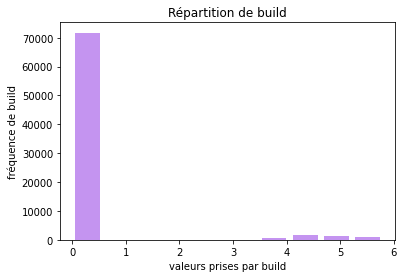

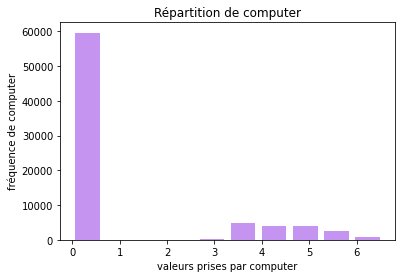

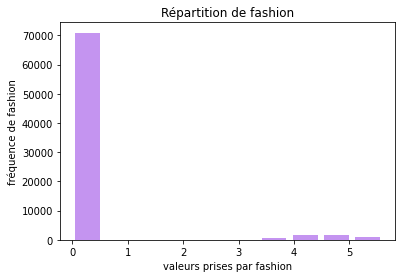

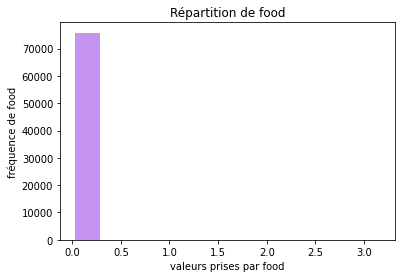

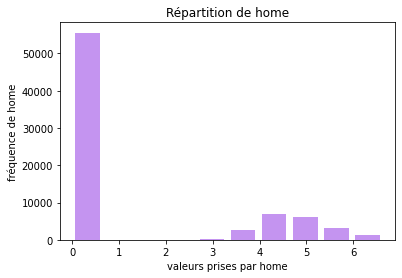

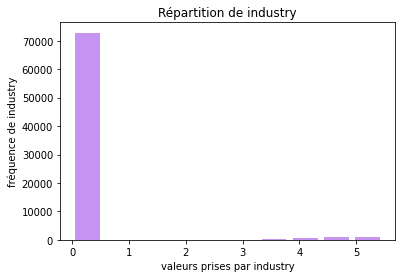

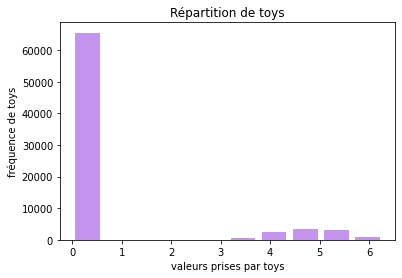

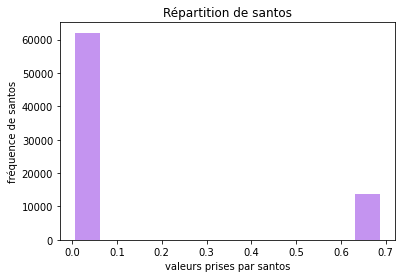

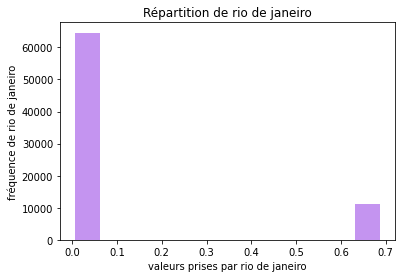

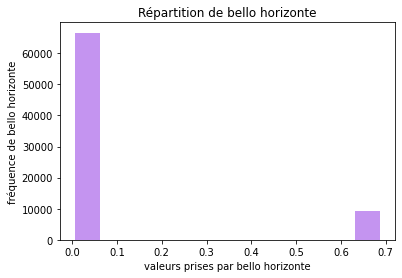

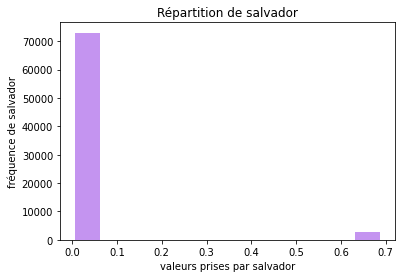

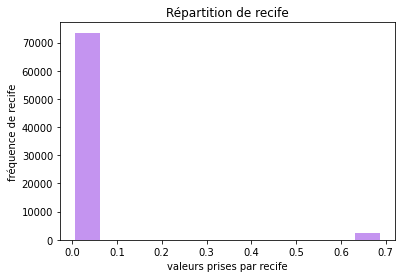

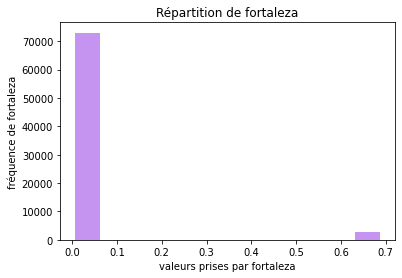

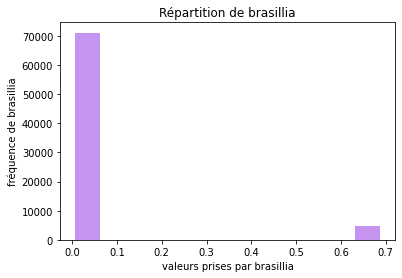

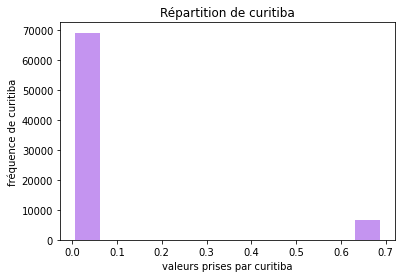

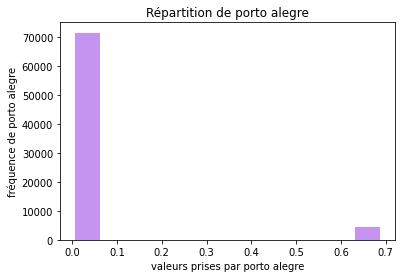

4:80: E501 line too long (87 > 79 characters)


In [2]:
# passage au log
for col in df:
    df[col] = np.log(df[col] + 1)
    plt.hist(df[col], color='blueviolet', alpha=0.5, histtype='barstacked', rwidth=0.8)
    plt.xlabel('valeurs prises par {}'.format(col))
    plt.ylabel('fréquence de {}'.format(col))
    plt.title('Répartition de {}'.format(col))
    plt.show()

In [3]:
# On recupère df dans numpy
X_log = df.to_numpy()

# PCA réduction dimensionnelle influence du Scaler

### Visualisation des datas dans l'espace PCA1, PCA2 et PCA3

/home/sylvain/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


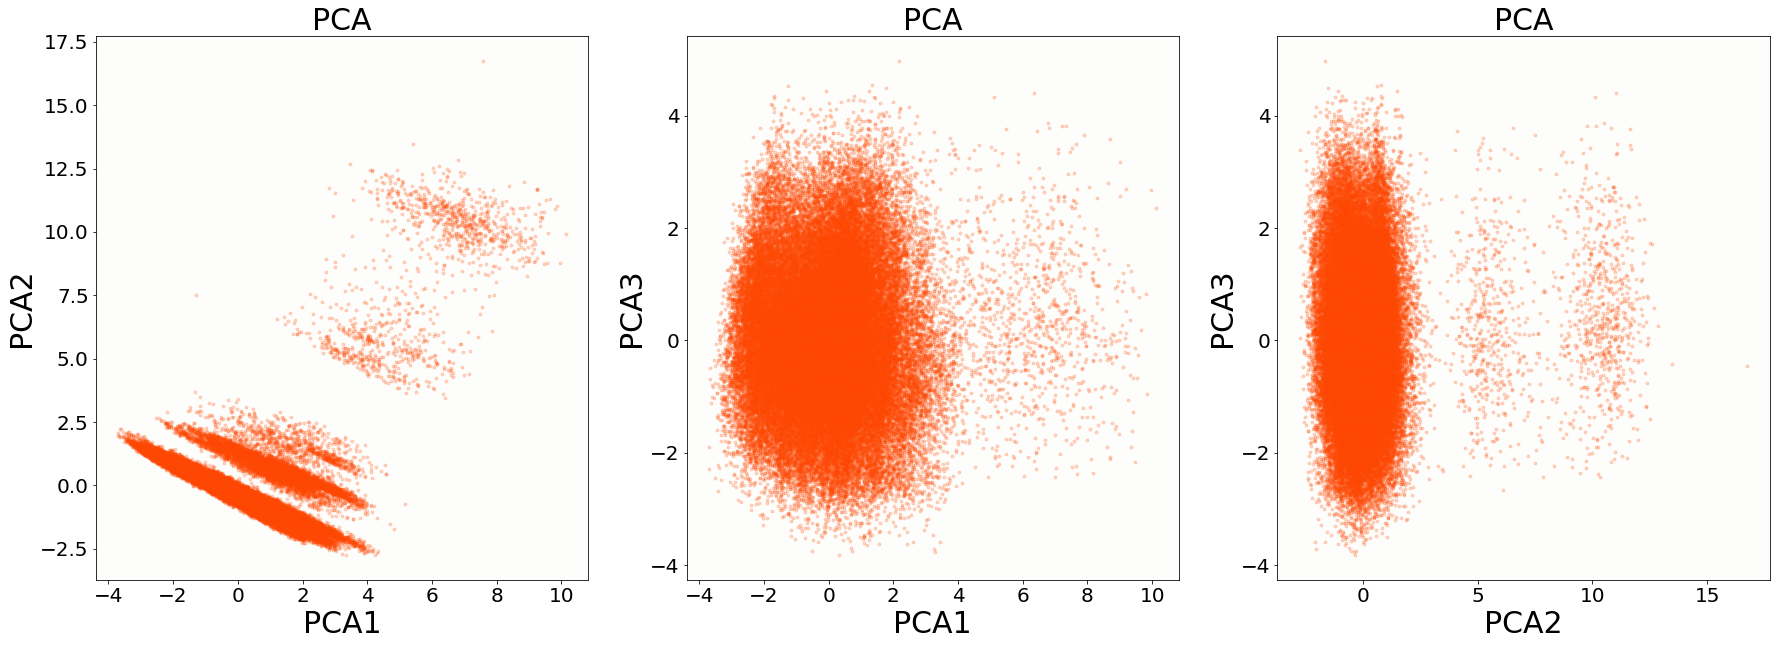

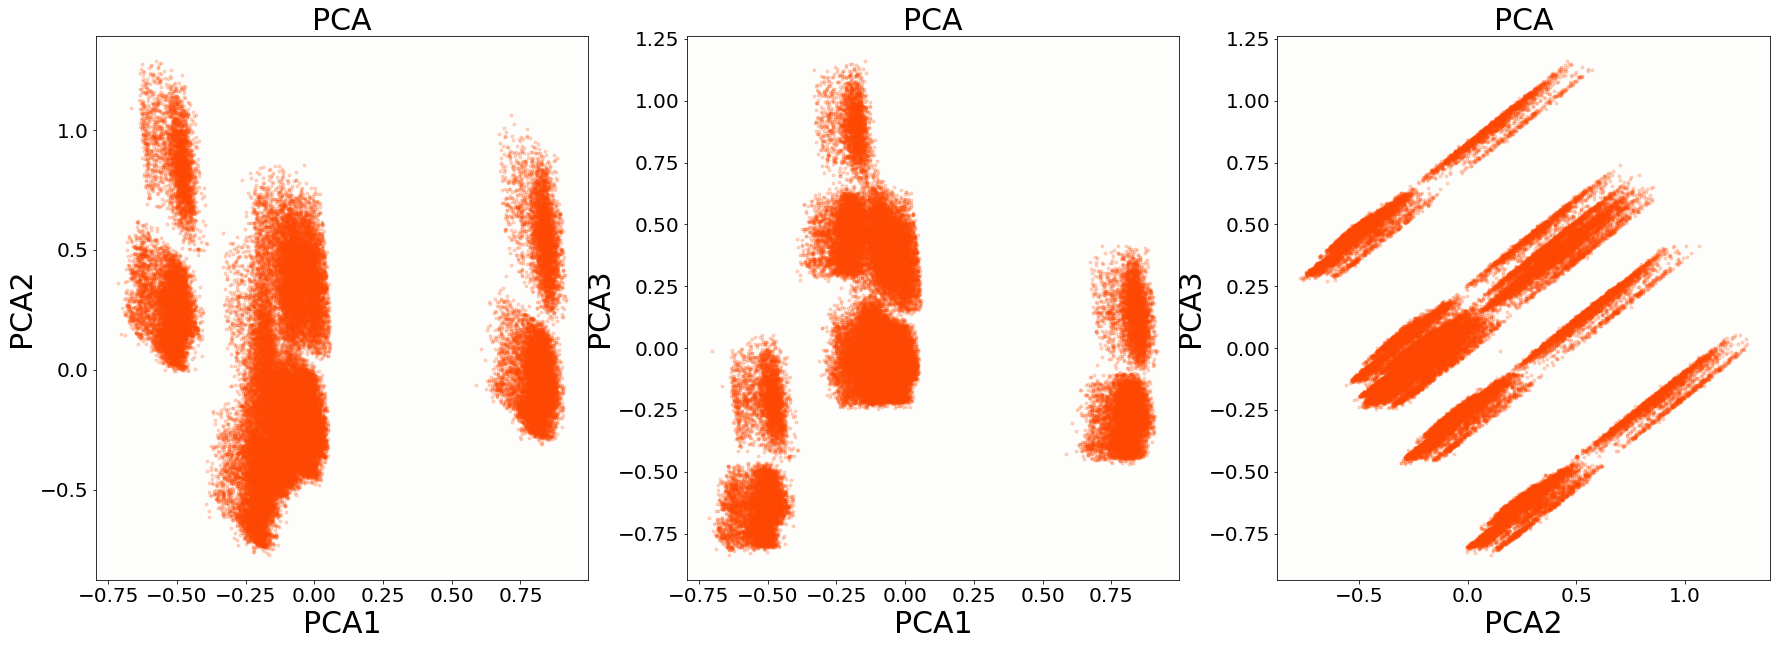

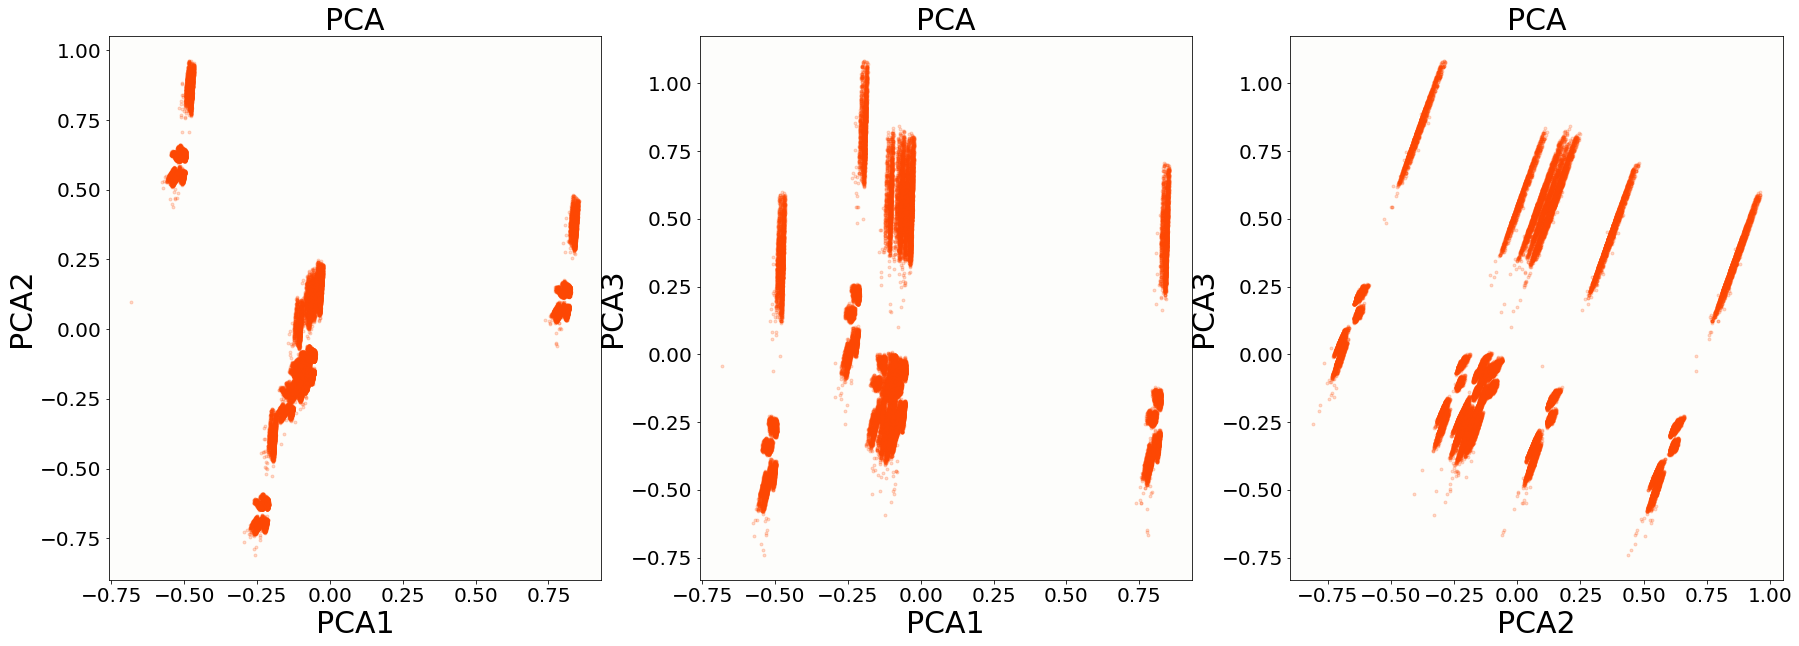

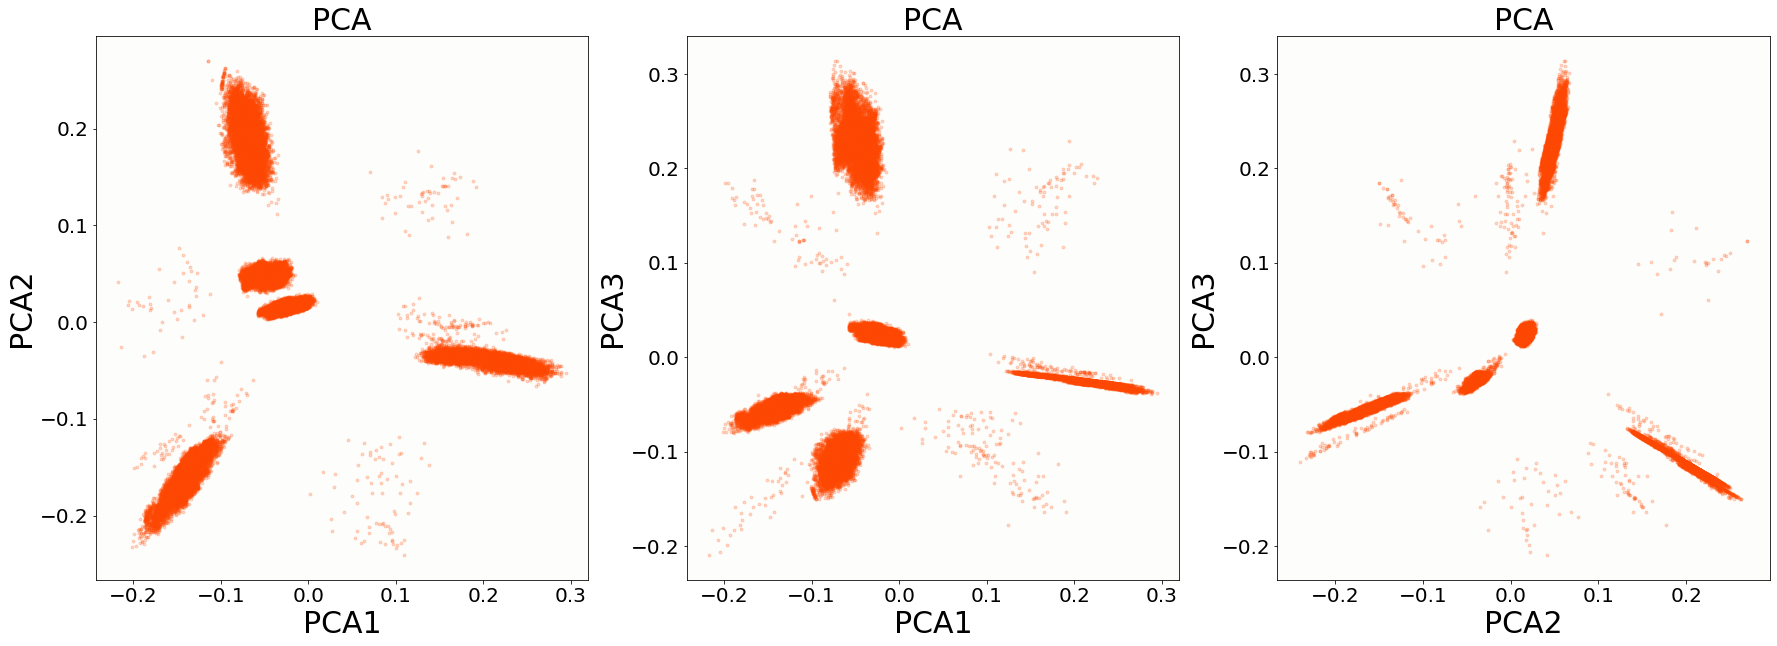

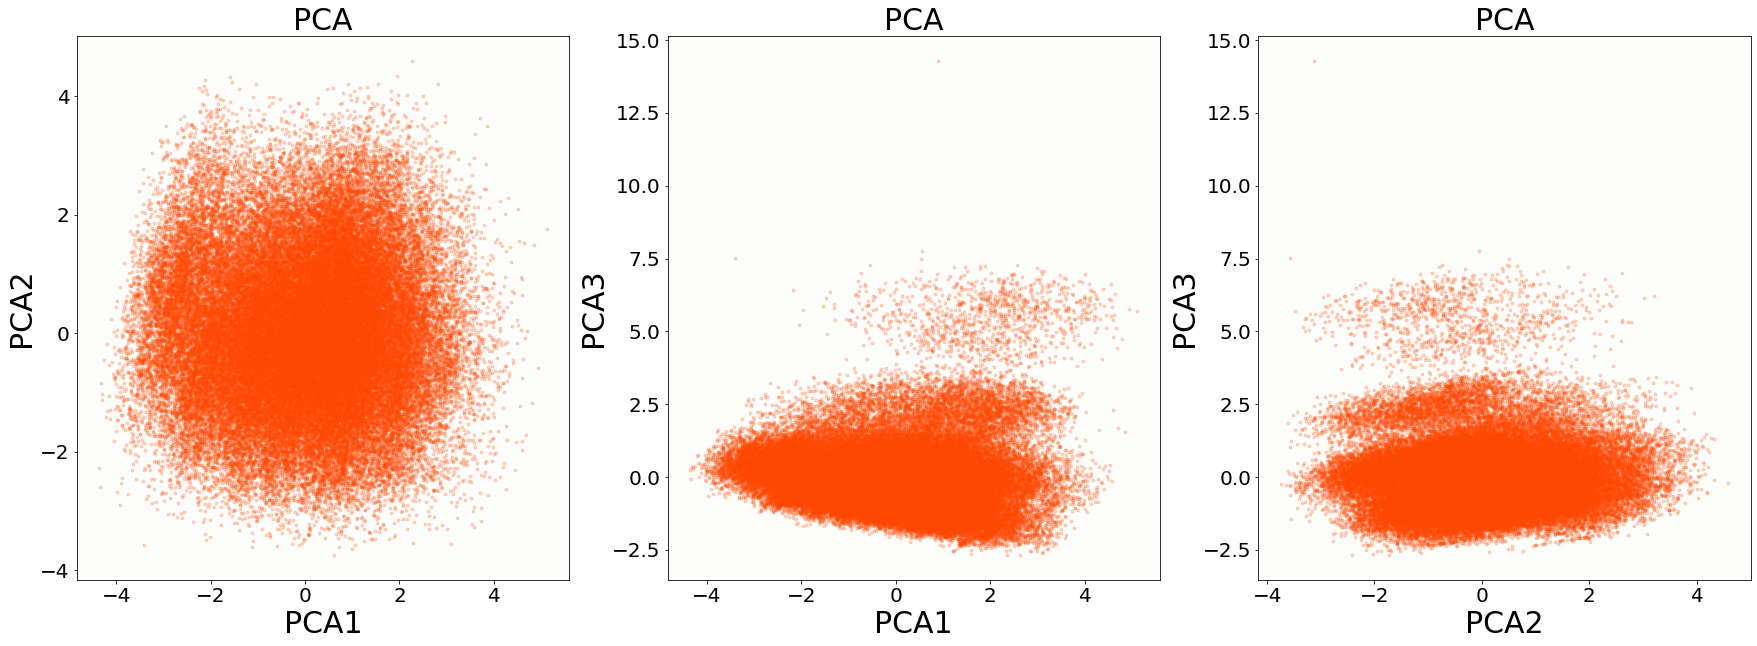

19:80: E501 line too long (93 > 79 characters)


In [6]:
# Standardisation des valeurs, on test
# différent Scaler
# PowerTransformation fait le passage
# au log lui même
listScale = [StandardScaler().fit_transform(X_log),
             MinMaxScaler().fit_transform(X_log),
             MaxAbsScaler().fit_transform(X_log),
             Normalizer().fit_transform(X_log),
             PowerTransformer().fit_transform(X)]

for scale in listScale:
    # PCA, on cherche a réduire les dimensions
    pca = PCA(n_components=scale.shape[1])
    scale = pca.fit_transform(scale)

    # Visualisation PCA1 et PCA2
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
    for i, j in combinations([0, 1, 2], 2):
        ax[i + j - 1].scatter(scale[:, i], scale[:, j], alpha=0.2, c='orangered', marker='.')
        ax[i + j - 1].set_title("PCA", fontsize=30)
        ax[i + j - 1].set_xlabel("PCA{}".format(i + 1), fontsize=30)
        ax[i + j - 1].set_ylabel("PCA{}".format(j + 1), fontsize=30)
        ax[i + j - 1].tick_params(axis='x', labelsize=20)
        ax[i + j - 1].tick_params(axis='y', labelsize=20)
        ax[i + j - 1].patch.set_facecolor("beige")
        ax[i + j - 1].patch.set_alpha(0.1)
plt.show()

### Visualisation des datas dans l'espace PCA1, PCA2 et PCA3

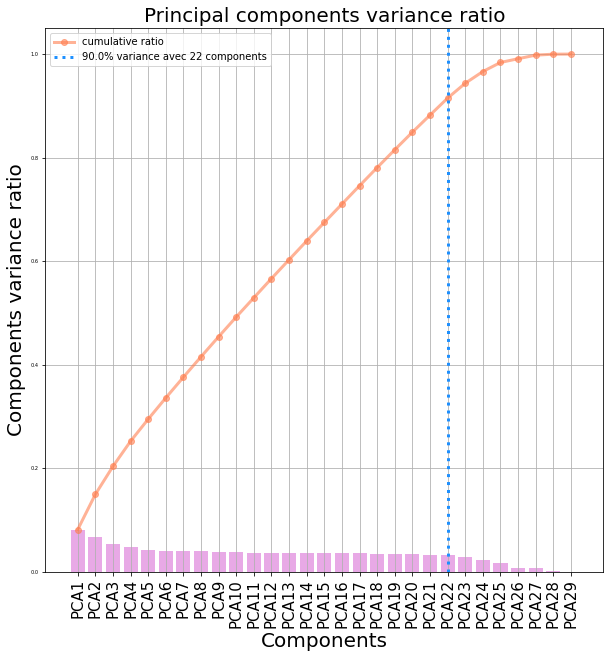

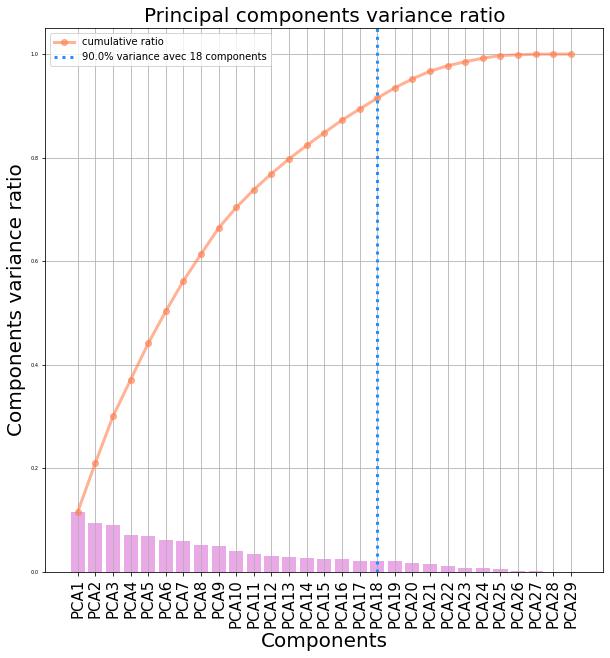

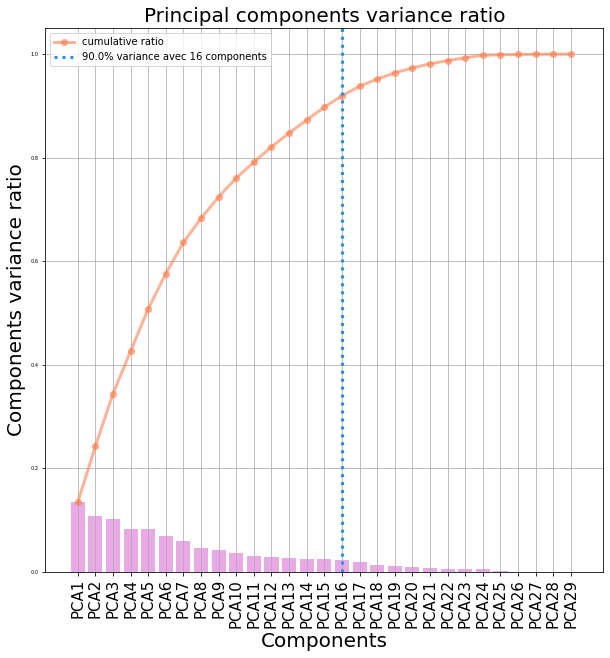

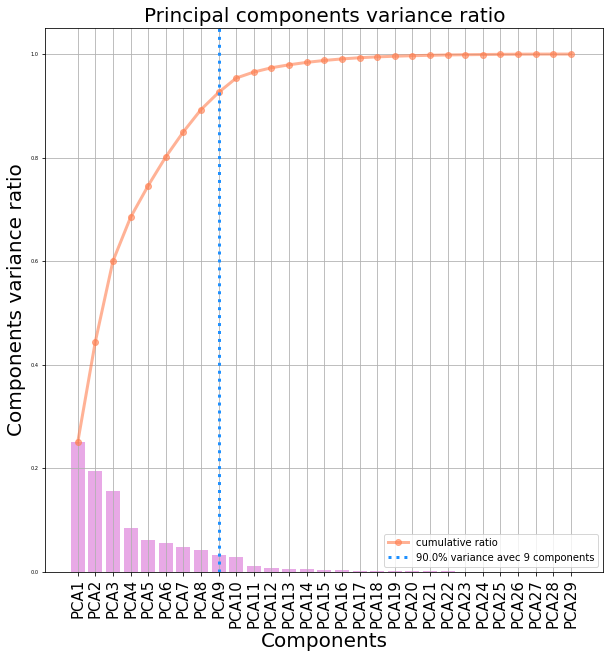

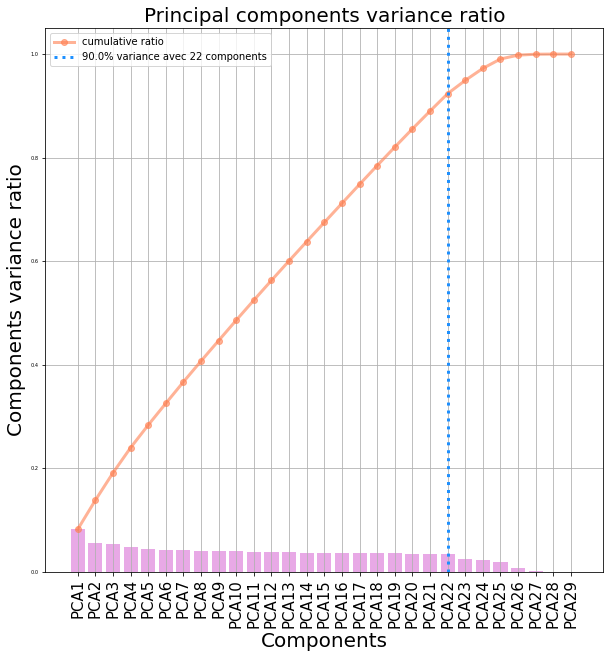

15:80: E501 line too long (82 > 79 characters)
24:80: E501 line too long (103 > 79 characters)
25:80: E501 line too long (134 > 79 characters)
26:80: E501 line too long (88 > 79 characters)


In [7]:
# affichage de la variance expliquée par les
# différentes composantes principales

for scale in listScale:
    # Cumulative ratio pour PCA
    pca = PCA(n_components=scale.shape[1])
    X_pca = pca.fit_transform(scale)

    x = np.linspace(1, X_pca.shape[1], X_pca.shape[1])
    y = pca.explained_variance_ratio_
    ratioVariance = np.cumsum(y)

    # Limitation de la réduction dimensionelle,
    # arbitrairement on choisi 90% de la variance expliqué
    # on récupère les nombre de composantes principales k, pour atteindre les 90%.
    limit = 0.9
    k = 0
    while ratioVariance[k] <= limit:
        k += 1

    # Affichage du cumul des ratios de la variance expliquée
    plt.figure(figsize=(10, 10))
    plt.bar(x, y, color='orchid', alpha=0.6)
    plt.plot(x, ratioVariance, label='cumulative ratio', c='coral', linewidth=3, marker='o', alpha=0.6)
    plt.axvline(x=k+1, linestyle=':', color='dodgerblue', linewidth=3, label="{}% variance avec {} components".format(limit*100, k+1))
    plt.xticks(x, ["PCA{}".format(int(i)) for i in x], fontsize=15, rotation='vertical')
    plt.yticks(fontsize=5)
    plt.xlabel("Components", fontsize=20)
    plt.ylabel("Components variance ratio", fontsize=20)
    plt.title("Principal components variance ratio", fontsize=20)
    plt.grid()
    plt.legend()
    plt.show()

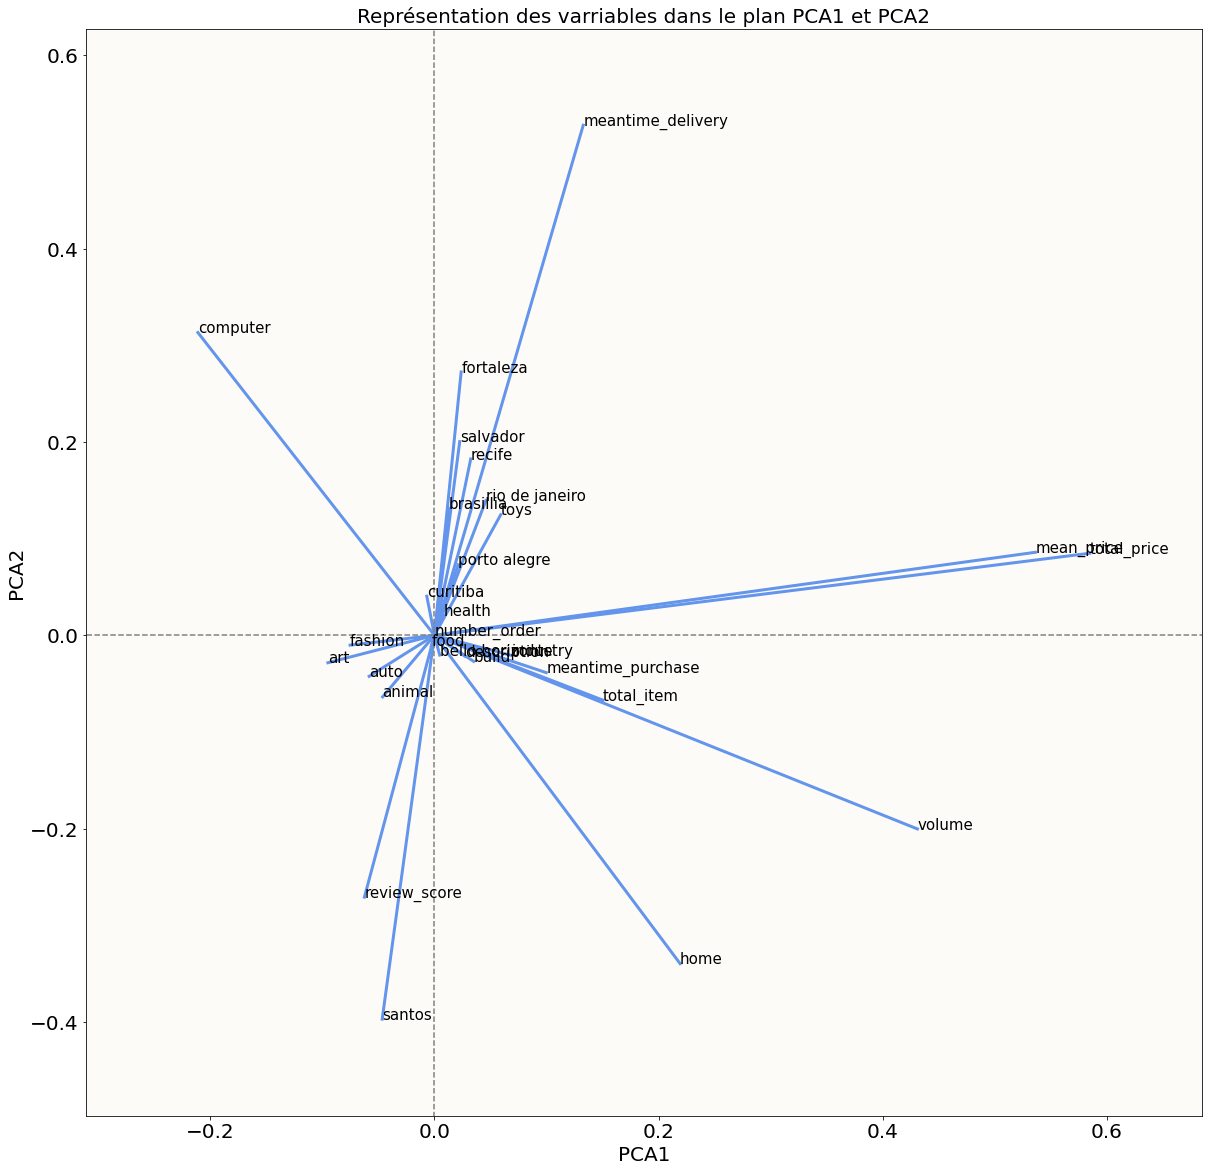

17:80: E501 line too long (84 > 79 characters)


In [8]:
# Visualisation des variables dans l'espace PCA1 PCA2
pcs = pca.components_
fig, ax = plt.subplots(figsize=(20, 20))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    ax.plot([0, x], [0, y], color='cornflowerblue', linewidth=3)
    # Afficher le nom (data.columns[i]) de la performance
    ax.text(x, y, df.columns[i], fontsize='15')

# Afficher une ligne horizontale y=0
ax.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
ax.plot([0, 0], [-1, 1], color='grey', ls='--')
ax.set_xlim([min(pcs[0, :]) - 0.1, max(pcs[0, :]) + 0.1])
ax.set_ylim([min(pcs[1, :]) - 0.1, max(pcs[1, :]) + 0.1])
ax.set_title("Représentation des varriables dans le plan PCA1 et PCA2", fontsize=20)
ax.set_xlabel("PCA1", fontsize=20)
ax.set_ylabel("PCA2", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.patch.set_facecolor("wheat")
ax.patch.set_alpha(0.1)
plt.show()

## TSNE réduction dimensionnelle

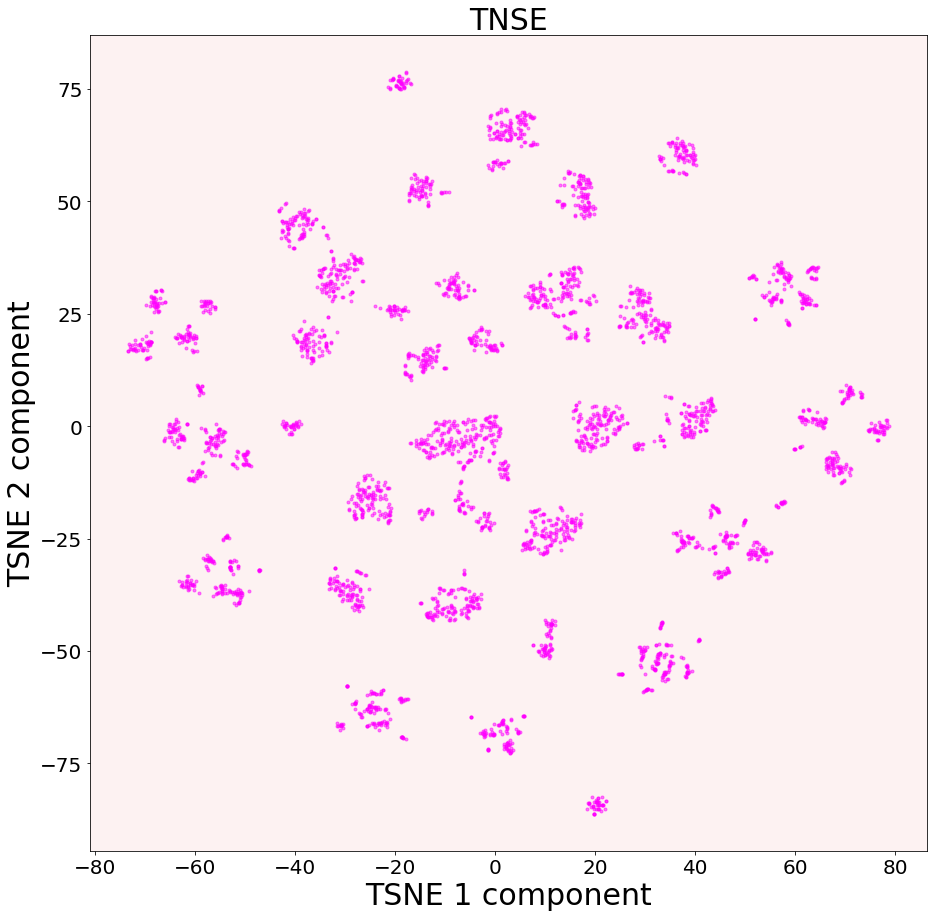

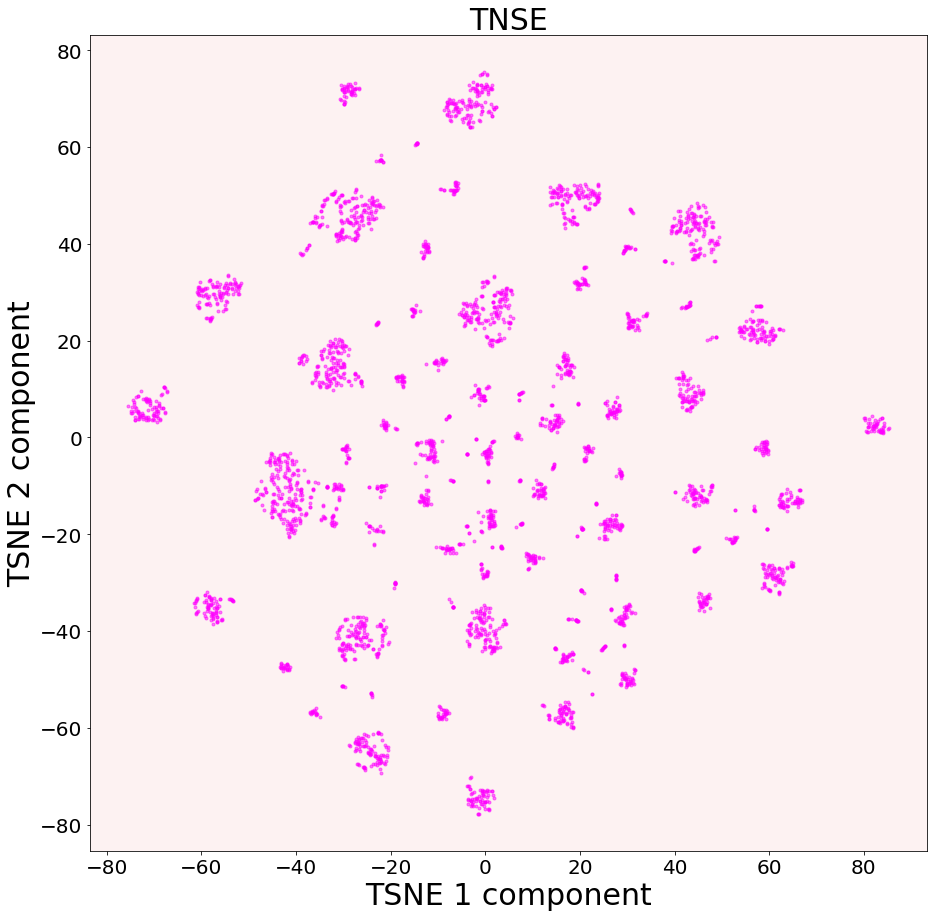

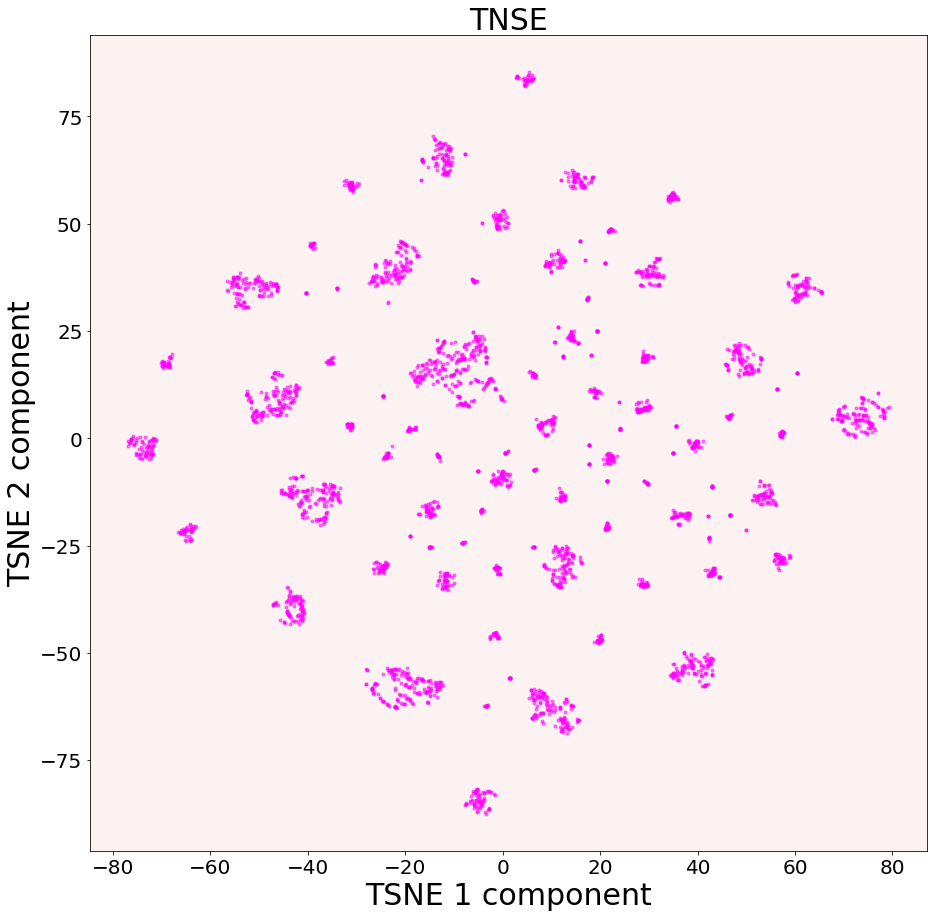

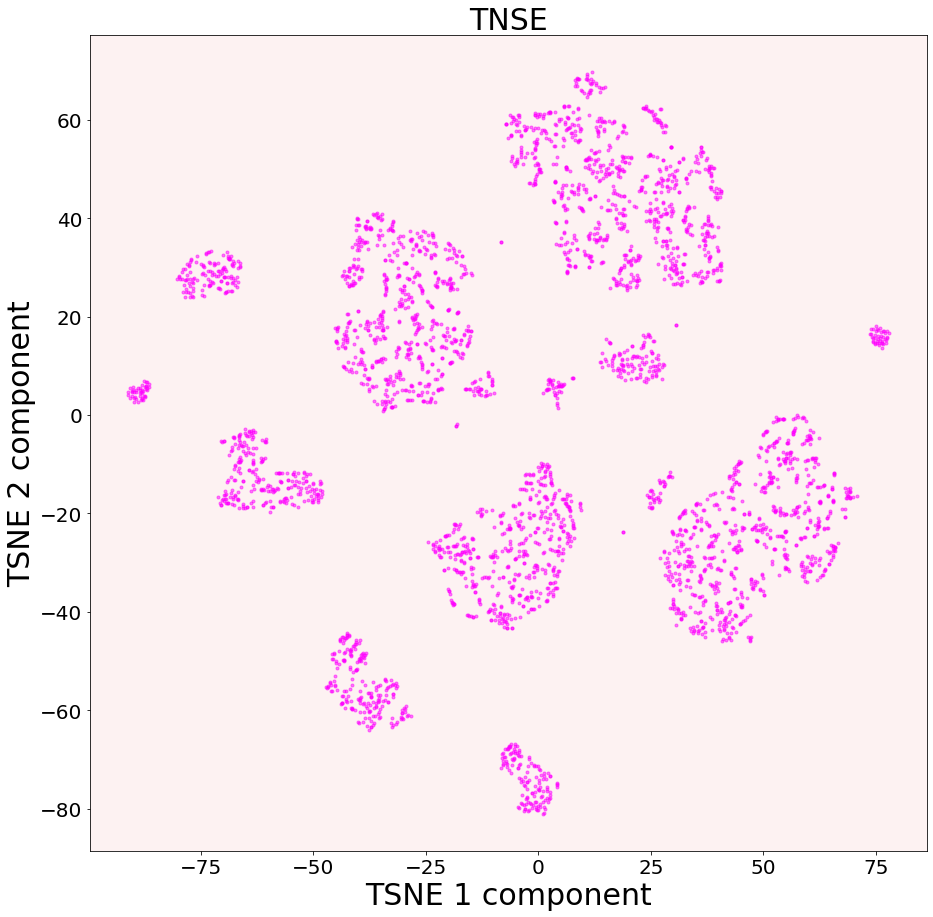

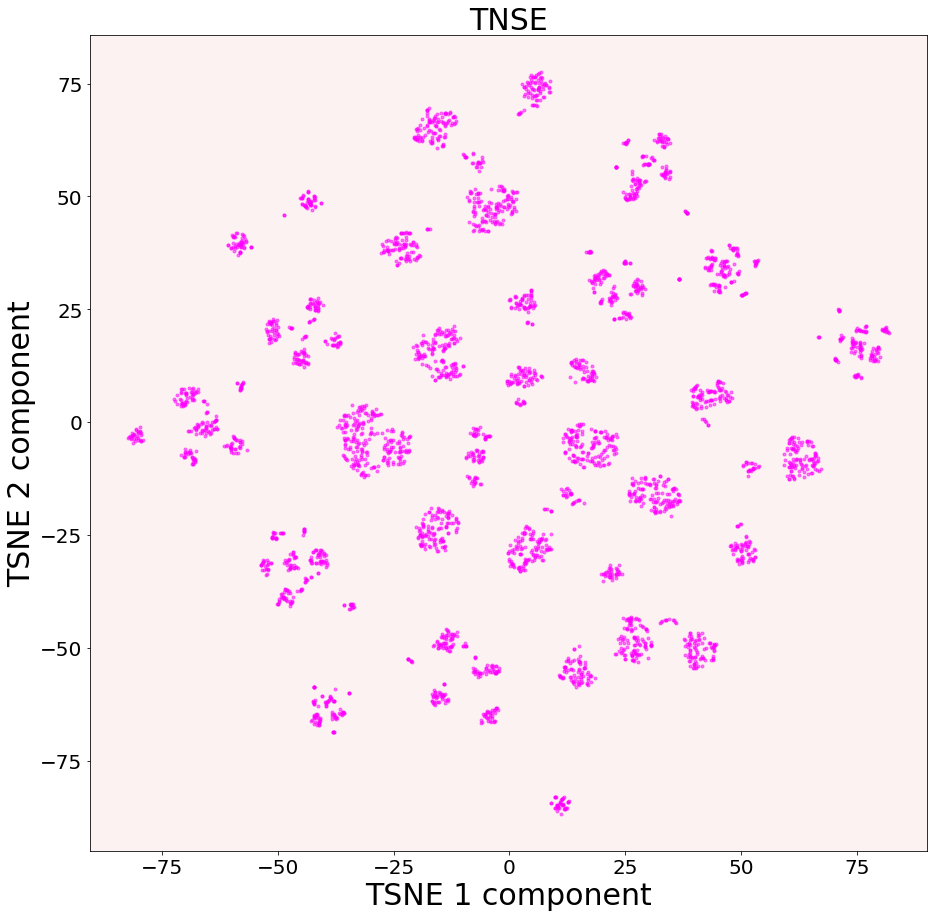

In [9]:
for scale in listScale:
    # sur un echantillon de X car temps de calcul trop long
    tx = int(np.round(scale.shape[0]*0.05))

    X_tsne = TSNE(n_components=2, n_jobs=-1).fit_transform(scale[:tx, :])

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, c='magenta', marker='.')
    ax.set_title("TNSE", fontsize=30)
    ax.set_xlabel("TSNE 1 component", fontsize=30)
    ax.set_ylabel("TSNE 2 component", fontsize=30)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.patch.set_facecolor("lightcoral")
    ax.patch.set_alpha(0.1)
    plt.show()

# Clustering 

### le scaler normalize semble être celui qui nous les meilleurs reduction dimensionnelle à la fois pour le PCA et le TSNE, on poursuit donc avec Normalizer 

### On définit sous échantillon plus petit de X car si nous voulons tester différent algo le temps de calul sera trop important. On se basera sur les scores obtenus pour poursuivre avec un algo plutot qu'un autre.

In [5]:
# normalization de X_log
X_log = Normalizer().fit_transform(X_log)

# ratio du dataset
tx = int(np.round(X_log.shape[0]*0.2))

# sous échantillons de X
X_sampled = X_log[:tx, :]

### K-means inertia with PCA

In [8]:
# sample for PCA, on utilise 9 composantes
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_sampled)

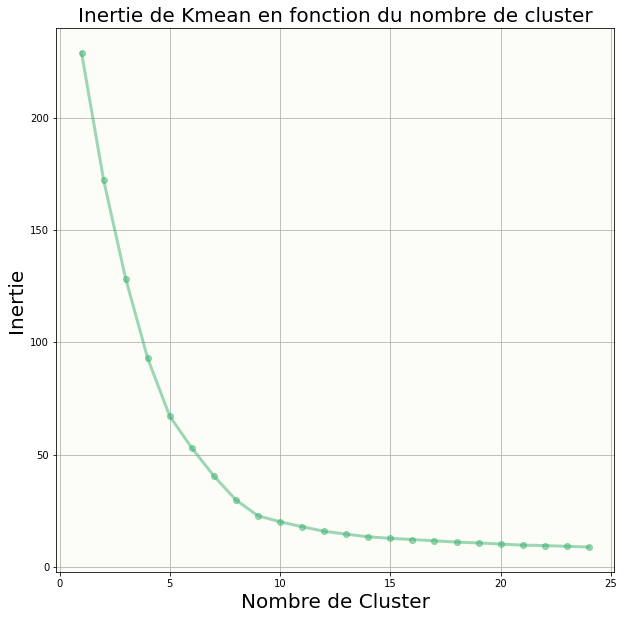

13:80: E501 line too long (91 > 79 characters)


In [14]:
# liste des nombre de clsuster a tester
cluster = np.arange(1, 25)

# inertie de kmeans
kmean_inertia = []

# Affichage de l'inertie de Kmeans avec PCA
for k in cluster:
    kmean_pca = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_pca)
    kmean_inertia.append(kmean_pca.inertia_)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(cluster, kmean_inertia, color='mediumseagreen', alpha=0.5, linewidth=3, marker='o')
ax.set_xlabel("Nombre de Cluster", fontsize=20)
ax.set_ylabel('Inertie', fontsize=20)
ax.patch.set_facecolor("beige")
ax.patch.set_alpha(0.2)
ax.set_title('Inertie de Kmean en fonction du nombre de cluster',  fontsize=20)
plt.grid()
plt.show()

### K-means inertia with TSNE

In [6]:
# sample for TSNE
tsne = TSNE(n_components=2, n_jobs=-1)
X_tsne = tsne.fit_transform(X_sampled)

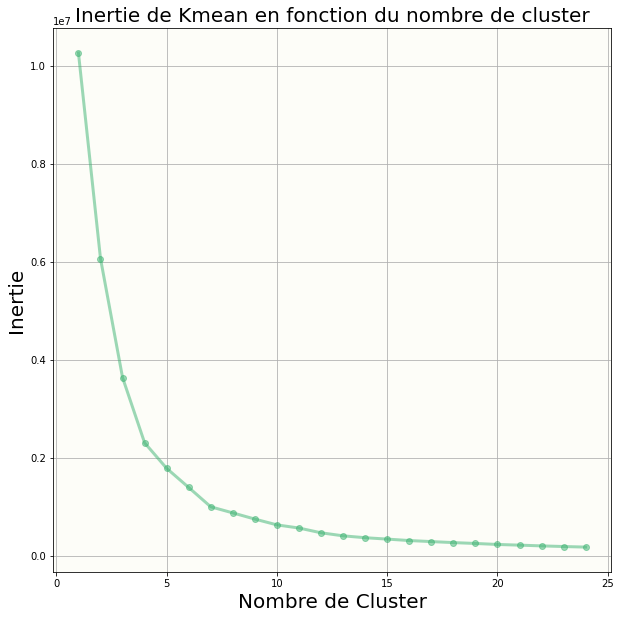

13:80: E501 line too long (91 > 79 characters)


In [16]:
# liste des nombre de clsuster a tester
cluster = np.arange(1, 25)

# inertie de kmeans
kmean_inertia = []

# Affichage de l'inertie de Kmeans avec PCA
for k in cluster:
    kmean_tsne = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_tsne)
    kmean_inertia.append(kmean_tsne.inertia_)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(cluster, kmean_inertia, color='mediumseagreen', alpha=0.5, linewidth=3, marker='o')
ax.set_xlabel("Nombre de Cluster", fontsize=20)
ax.set_ylabel('Inertie', fontsize=20)
ax.patch.set_facecolor("beige")
ax.patch.set_alpha(0.2)
ax.set_title('Inertie de Kmean en fonction du nombre de cluster',  fontsize=20)
plt.grid()
plt.show()

# Tuning parameter, Best number of cluster, Davies Bouldin score

### with PCA (X_pca)

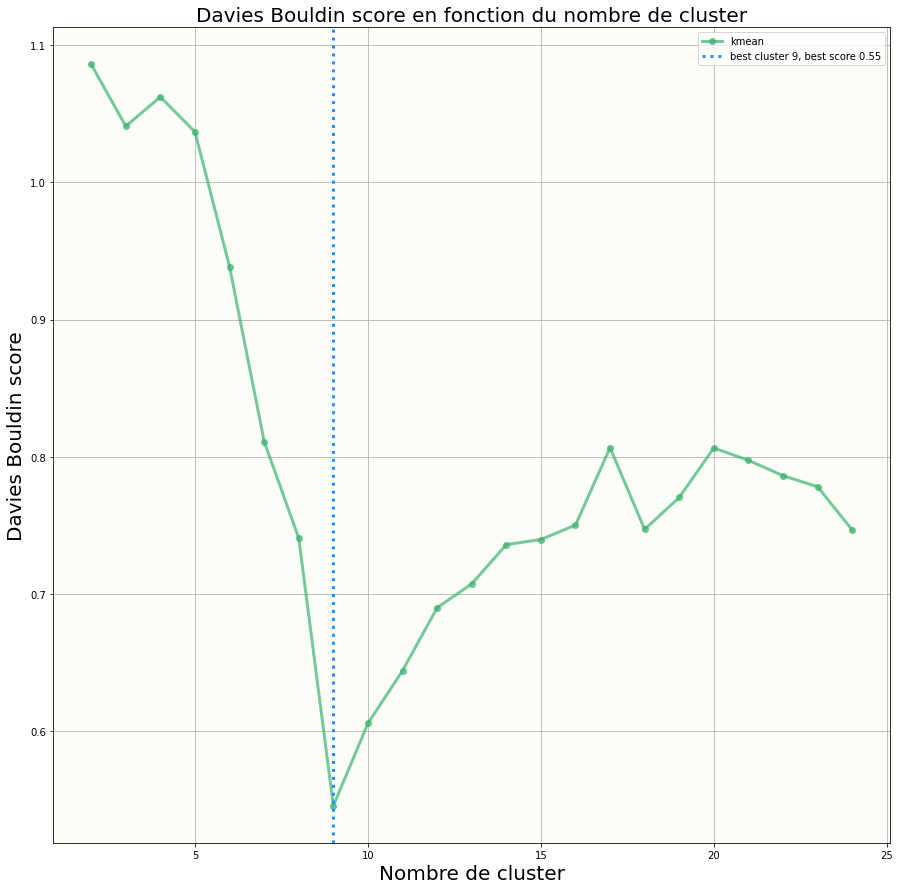

23:80: E501 line too long (103 > 79 characters)
24:80: E501 line too long (151 > 79 characters)
29:80: E501 line too long (83 > 79 characters)


In [9]:
# On fait varier le nombre de cluster
kmeanScore = []  # Kmean

# liste des nombre de clsuster a tester
maxScore = 1  # initialisation avec le pire score silhouette
cluster = np.arange(2, 25)

for k in cluster:

    # On teste differents algo
    kmean = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_pca)

    # On récupère les scores des différents algo
    kmeanScore.append(davies_bouldin_score(X_pca, kmean.labels_))

    # cluster pour lequel on a un score maximum
    if kmeanScore[-1] < maxScore:
        maxScore = kmeanScore[-1]
        bestCluster = k

# On affiche les scores
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(cluster, kmeanScore, label='kmean', color='mediumseagreen', alpha=0.7, linewidth=3, marker='o')
ax.axvline(x=bestCluster, linestyle=':', color='dodgerblue', linewidth=3, label="best cluster {0:d}, best score {1:.2f}".format(bestCluster, maxScore))
ax.set_xlabel("Nombre de cluster", fontsize=20)
ax.set_ylabel('Davies Bouldin score', fontsize=20)
ax.patch.set_facecolor("beige")
ax.patch.set_alpha(0.2)
ax.set_title('Davies Bouldin score en fonction du nombre de cluster',  fontsize=20)
plt.legend()
plt.grid()
plt.show()

### with TSNE (X_tsne)

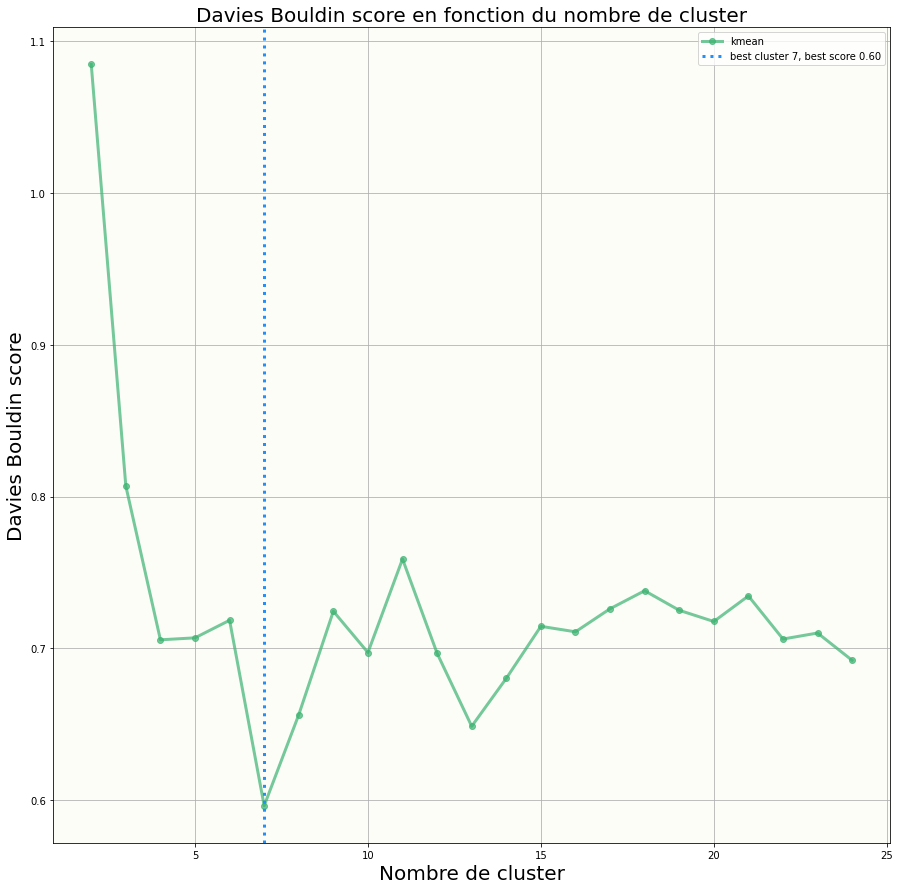

23:80: E501 line too long (103 > 79 characters)
24:80: E501 line too long (151 > 79 characters)
29:80: E501 line too long (83 > 79 characters)


In [19]:
# On fait varier le nombre de cluster
kmeanScore = []  # Kmean

# liste des nombre de clsuster a tester
maxScore = 1  # initialisation avec le pire score silhouette
cluster = np.arange(2, 25)

for k in cluster:

    # On teste differents algo
    kmean = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_tsne)

    # On récupère les scores des différents algo
    kmeanScore.append(davies_bouldin_score(X_tsne, kmean.labels_))

    # cluster pour lequel on a un score maximum
    if kmeanScore[-1] < maxScore:
        maxScore = kmeanScore[-1]
        bestCluster = k

# On affiche les score
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(cluster, kmeanScore, label='kmean', color='mediumseagreen', alpha=0.7, linewidth=3, marker='o')
ax.axvline(x=bestCluster, linestyle=':', color='dodgerblue', linewidth=3, label="best cluster {0:d}, best score {1:.2f}".format(bestCluster, maxScore))
ax.set_xlabel("Nombre de cluster", fontsize=20)
ax.set_ylabel('Davies Bouldin score', fontsize=20)
ax.patch.set_facecolor("beige")
ax.patch.set_alpha(0.2)
ax.set_title('Davies Bouldin score en fonction du nombre de cluster',  fontsize=20)
plt.legend()
plt.grid()
plt.show()

# Tuning parameter, Best number of cluster, Silhouette coefficient

### with PCA (X_pca)

/home/sylvain/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/sylvain/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/sylvain/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/sylvain/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 a

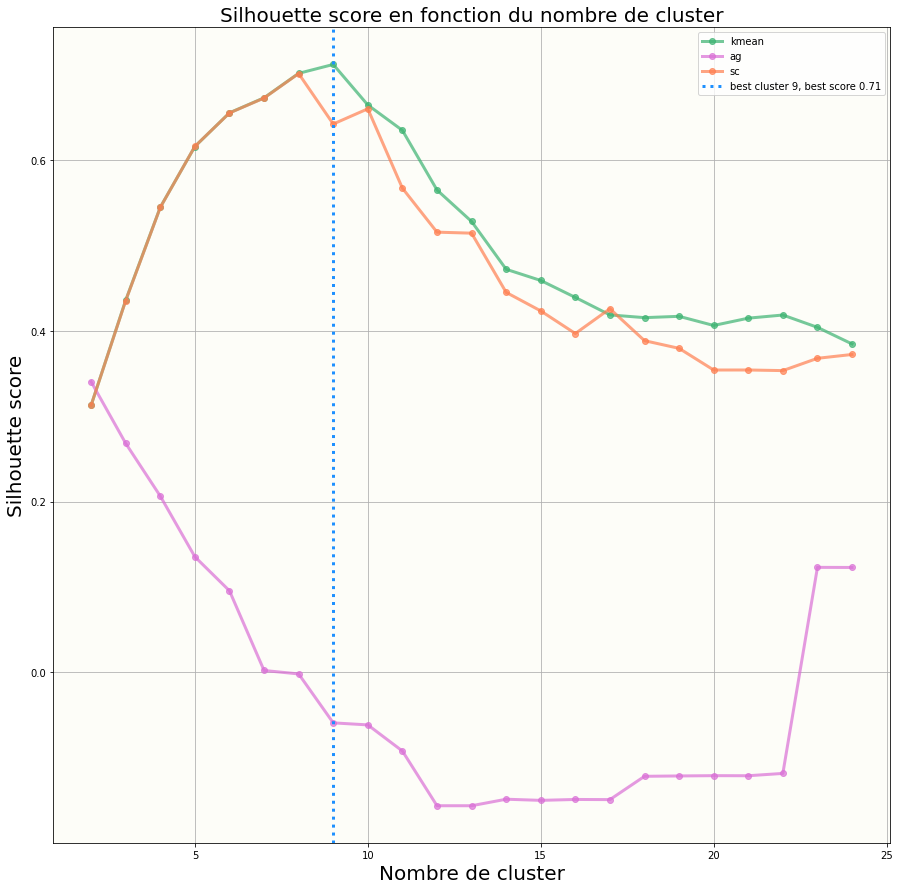

21:80: E501 line too long (81 > 79 characters)
48:80: E501 line too long (103 > 79 characters)
49:80: E501 line too long (128 > 79 characters)
50:80: E501 line too long (134 > 79 characters)
51:80: E501 line too long (89 > 79 characters)
52:80: E501 line too long (88 > 79 characters)
53:80: E501 line too long (131 > 79 characters)
54:80: E501 line too long (126 > 79 characters)
55:80: E501 line too long (151 > 79 characters)


In [22]:
# On réduit le nombre de data => machine pas capable
# de fare tourner ce code sur l'ensemble de jeu
# de données

# On fait varier le nombre de cluster
kmeanScore = []  # Kmean
dbScore = []  # coefficients silhouette pour DBSCAN
afScore = []  # coefficients silhouette pour Affinity propagation
msScore = []  # coefficients silhouette pour MeanShift
agScore = []  # coefficients silhouette pour Agglomerative Clustering
scScore = []  # coefficients silhouette pour Spectral Clustering
opScore = []  # coefficients silhouette pour OPTICS

# liste des nombre de clsuster a tester
maxScore = -1  # initialisation avec le pire score silhouette
cluster = np.arange(2, 25)

for k in cluster:

    # On teste differents algo
    kmean = KMeans(n_clusters=k, random_state=0, n_init=10, n_jobs=-1).fit(X_pca)
    ag = AgglomerativeClustering(linkage='single', n_clusters=k).fit(X_pca)
    sc = SpectralClustering(n_clusters=k).fit(X_pca)

    # On récupère les scores des différents algo
    kmeanScore.append(silhouette_score(X_pca, kmean.labels_))
    agScore.append(silhouette_score(X_pca, ag.labels_))
    scScore.append(silhouette_score(X_pca, sc.labels_))

    if kmeanScore[-1] > maxScore:
        maxScore = kmeanScore[-1]
        bestCluster = k


# ces algo sont indépendant du nombre de cluster
# op = OPTICS().fit(X_pcat)
# db = DBSCAN().fit(X_pcat)
# ms = MeanShift().fit(X_pcat)
# af = AffinityPropagation(random_state = 0).fit(X_pcat)
# score
# opScore = silhouette_score(X_pcat, op.labels_)
# dbScore = silhouette_score(X_pcat, db.labels_)
# msScore = silhouette_score(X_pcat, ms.labels_)
# afScore = silhouette_score(X_pcat, af.labels_)

# On affiche les scores
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(cluster, kmeanScore, label='kmean', color='mediumseagreen', alpha=0.7, linewidth=3, marker='o')
# ax.plot(cluster, afScore*np.ones(len(cluster)), color = 'slateblue', alpha = 0.7, linewidth = 3, linestyle = ':', label= 'af')
# ax.plot(cluster, msScore*np.ones(len(cluster)), color = 'mediumturquoise', alpha = 0.7, linewidth = 3, linestyle = ':', label= 'ms')
ax.plot(cluster, agScore, color='orchid', alpha=0.7, linewidth=3, label='ag', marker='o')
ax.plot(cluster, scScore, color='coral', alpha=0.7, linewidth=3, label='sc', marker='o')
# ax.plot(cluster, opScore*np.ones(len(cluster)), color = 'lightseagreen', alpha = 0.7, linewidth = 3,linestyle = ':', label= 'op')
# ax.plot(cluster, dbScore*np.ones(len(cluster)), color = 'magenta', alpha = 0.7, linewidth = 3, linestyle = ':', label= 'db')
ax.axvline(x=bestCluster, linestyle=':', color='dodgerblue', linewidth=3, label="best cluster {0:d}, best score {1:.2f}".format(bestCluster, maxScore))
ax.set_xlabel("Nombre de cluster", fontsize=20)
ax.set_ylabel('Silhouette score', fontsize=20)
ax.patch.set_facecolor("beige")
ax.patch.set_alpha(0.2)
ax.set_title('Silhouette score en fonction du nombre de cluster',  fontsize=20)
plt.legend()
plt.grid()
plt.show()

### with TSNE

/home/sylvain/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/sylvain/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/sylvain/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/sylvain/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 a

33.63204073905945


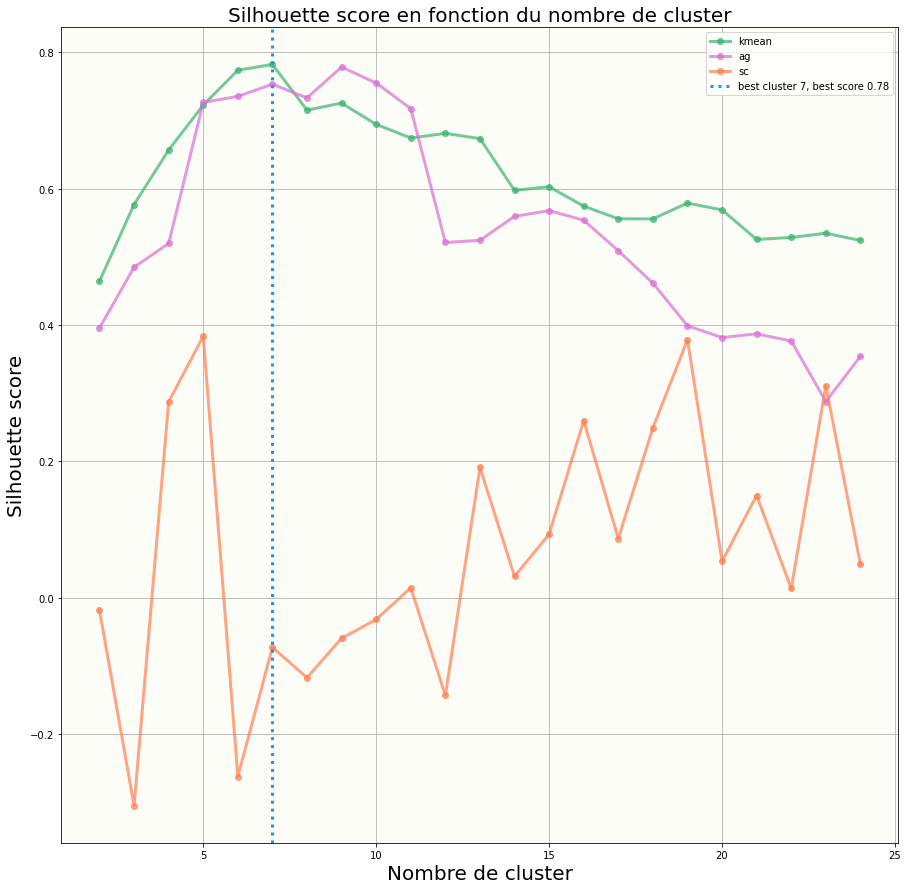

22:80: E501 line too long (82 > 79 characters)
50:80: E501 line too long (103 > 79 characters)
51:80: E501 line too long (128 > 79 characters)
52:80: E501 line too long (134 > 79 characters)
53:80: E501 line too long (89 > 79 characters)
54:80: E501 line too long (88 > 79 characters)
55:80: E501 line too long (131 > 79 characters)
56:80: E501 line too long (126 > 79 characters)
57:80: E501 line too long (151 > 79 characters)


In [7]:
# On réduit le nombre de data => machine pas capable
# de fare tourner ce code sur l'ensemble de jeu
# de données

# On fait varier le nombre de cluster
kmeanScore = []  # Kmean
dbScore = []  # coefficients silhouette pour DBSCAN
afScore = []  # coefficients silhouette pour Affinity propagation
msScore = []  # coefficients silhouette pour MeanShift
agScore = []  # coefficients silhouette pour Agglomerative Clustering
scScore = []  # coefficients silhouette pour Spectral Clustering
opScore = []  # coefficients silhouette pour OPTICS

# liste des nombre de clsuster a tester
maxScore = -1  # initialisation avec le pire score silhouette
cluster = np.arange(2, 25)

T1 = time.time()
for k in cluster:

    # On teste differents algo
    kmean = KMeans(n_clusters=k, random_state=0, n_init=10, n_jobs=-1).fit(X_tsne)
    ag = AgglomerativeClustering(linkage='single', n_clusters=k).fit(X_tsne)
    sc = SpectralClustering(n_clusters=k).fit(X_tsne)

    # On récupère les scores des différents algo
    kmeanScore.append(silhouette_score(X_tsne, kmean.labels_))
    agScore.append(silhouette_score(X_tsne, ag.labels_))
    scScore.append(silhouette_score(X_tsne, sc.labels_))

    if kmeanScore[-1] > maxScore:
        maxScore = kmeanScore[-1]
        bestCluster = k

T2 = time.time()
print(T2 - T1)
# ces algo sont indépendant du nombre de cluster
# op = OPTICS().fit(X_pcat)
# db = DBSCAN().fit(X_pcat)
# ms = MeanShift().fit(X_pcat)
# af = AffinityPropagation(random_state = 0).fit(X_pcat)
# score
# opScore = silhouette_score(X_pcat, op.labels_)
# dbScore = silhouette_score(X_pcat, db.labels_)
# msScore = silhouette_score(X_pcat, ms.labels_)
# afScore = silhouette_score(X_pcat, af.labels_)

# On affiche les scores
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(cluster, kmeanScore, label='kmean', color='mediumseagreen', alpha=0.7, linewidth=3, marker='o')
# ax.plot(cluster, afScore*np.ones(len(cluster)), color = 'slateblue', alpha = 0.7, linewidth = 3, linestyle = ':', label= 'af')
# ax.plot(cluster, msScore*np.ones(len(cluster)), color = 'mediumturquoise', alpha = 0.7, linewidth = 3, linestyle = ':', label= 'ms')
ax.plot(cluster, agScore, color='orchid', alpha=0.7, linewidth=3, label='ag', marker='o')
ax.plot(cluster, scScore, color='coral', alpha=0.7, linewidth=3, label='sc', marker='o')
# ax.plot(cluster, opScore*np.ones(len(cluster)), color = 'lightseagreen', alpha = 0.7, linewidth = 3,linestyle = ':', label= 'op')
# ax.plot(cluster, dbScore*np.ones(len(cluster)), color = 'magenta', alpha = 0.7, linewidth = 3, linestyle = ':', label= 'db')
ax.axvline(x=bestCluster, linestyle=':', color='dodgerblue', linewidth=3, label="best cluster {0:d}, best score {1:.2f}".format(bestCluster, maxScore))
ax.set_xlabel("Nombre de cluster", fontsize=20)
ax.set_ylabel('Silhouette score', fontsize=20)
ax.patch.set_facecolor("beige")
ax.patch.set_alpha(0.2)
ax.set_title('Silhouette score en fonction du nombre de cluster',  fontsize=20)
plt.legend()
plt.grid()
plt.show()

### on constate qu'avec qu'une réduction dimensionnelle TSNE et l'aglo Kmeans on obtient les meilleurs score de silhouette. On poursuivra donc avec cette configuration. 

In [22]:
# on ne concentre que sur X sample
dft = df.copy()
dft = dft.iloc[0: tx]

# Affichage cluster

### on retransforme les données pour pouvoir les interpréter

In [23]:
# on ne concentre que sur X sample
dft = df.copy()
dft = dft.iloc[0: tx]

In [24]:
PCA(n_components=9)  # inverse transformation: log inverse
for col in dft:
    dft[col] = np.exp(dft[col]) - 1

In [25]:
dft.head()

number_order  meantime_purchase  \
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2           1.0                0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f           1.0                0.0   
0000f46a3911fa3c0805444483337064           1.0                0.0   
0000f6ccb0745a6a4b88665a16c9f078           1.0                0.0   
0004aac84e0df4da2b147fca70cf8255           1.0                0.0   

                                  meantime_delivery  total_item  mean_price  \
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2           553930.0         1.0      129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           283875.0         1.0       18.90   
0000f46a3911fa3c0805444483337064          2219624.0         1.0       69.00   
0000f6ccb0745a6a4b88665a16c9f078          1734804.0         1.0       25.99   
0004aac84e0df4da2b147fca70cf8255          1135394.0         1.0      180.00   

                                   volume  description  total_price  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2   7616.0     0.886066       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f   5148.0     0.761897        27.19   
0000f46a3911fa3c0805444483337064  43750.0     0.876575        86.22   
0000f6ccb0745a6a4b88665a16c9f078   1045.0     0.988318        43.62   
0004aac84e0df4da2b147fca70cf8255    528.0     0.608063       196.89   

                                  review_score  art  animal  health  auto  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2           5.0  0.0     0.0    0.00   0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f           4.0  0.0     0.0   27.19   0.0   
0000f46a3911fa3c0805444483337064           3.0  0.0     0.0    0.00   0.0   
0000f6ccb0745a6a4b88665a16c9f078           4.0  0.0     0.0    0.00   0.0   
0004aac84e0df4da2b147fca70cf8255           5.0  0.0     0.0    0.00   0.0   

                                  build  computer  fashion  food   home  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2    0.0      0.00      0.0   0.0  141.9   
0000b849f77a49e4a4ce2b2a4ca5be3f    0.0      0.00      0.0   0.0    0.0   
0000f46a3911fa3c0805444483337064    0.0      0.00      0.0   0.0    0.0   
0000f6ccb0745a6a4b88665a16c9f078    0.0     43.62      0.0   0.0    0.0   
0004aac84e0df4da2b147fca70cf8255    0.0    196.89      0.0   0.0    0.0   

                                  industry  toys  santos  rio de janeiro  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2      0.00   0.0     0.0             0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      0.00   0.0     0.0             0.0   
0000f46a3911fa3c0805444483337064     86.22   0.0     0.0             0.0   
0000f6ccb0745a6a4b88665a16c9f078      0.00   0.0     0.0             0.0   
0004aac84e0df4da2b147fca70cf8255      0.00   0.0     1.0             0.0   

                                  bello horizonte  salvador  recife  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2              0.0       0.0     0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f              0.0       0.0     0.0   
0000f46a3911fa3c0805444483337064              0.0       0.0     0.0   
0000f6ccb0745a6a4b88665a16c9f078              0.0       0.0     0.0   
0004aac84e0df4da2b147fca70cf8255              0.0       0.0     0.0   

                                  fortaleza  brasillia  curitiba  porto alegre  
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2        0.0        0.0       0.0           0.0  
0000b849f77a49e4a4ce2b2a4ca5be3f        0.0        0.0       0.0           0.0  
0000f46a3911fa3c0805444483337064        0.0        0.0       1.0           0.

### on ajoute une colonne permettant d'associer un cluster a chaque client

In [26]:
# on on fait une reduction dimensionnelle TSNE, puis
# un KMean, on predit les clusters pour chaque client
kmean_tsne = KMeans(n_clusters=7, random_state=0, n_init=10).fit(X_tsne)
dft['cluster'] = pd.Series(data=kmean_tsne.predict(X_tsne), index=dft.index)
dft.head(100)

number_order  meantime_purchase  \
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2           1.0                0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f           1.0                0.0   
0000f46a3911fa3c0805444483337064           1.0                0.0   
0000f6ccb0745a6a4b88665a16c9f078           1.0                0.0   
0004aac84e0df4da2b147fca70cf8255           1.0                0.0   
0004bd2a26a76fe21f786e4fbd80607f           1.0                0.0   
00050ab1314c0e55a6ca13cf7181fecf           1.0                0.0   
0005e1862207bf6ccc02e4228effd9a0           1.0                0.0   
0006fdc98a402fceb4eb0ee528f6a8d4           1.0                0.0   
00090324bbad0e9342388303bb71ba0a           1.0                0.0   
000949456b182f53c18b68d6babc79c1           1.0                0.0   
000a5ad9c4601d2bbdd9ed765d5213b3           1.0                0.0   
000bfa1d2f1a41876493be685390d6d3           1.0                0.0   
000c8bdb58a29e7115cfc257230fb21b           1.0                0.0   
000d460961d6dbfa3ec6c9f5805769e1           1.0                0.0   
000de6019bb59f34c099a907c151d855           1.0                0.0   
000e309254ab1fc5ba99dd469d36bdb4           1.0                0.0   
000ec5bff359e1c0ad76a81a45cb598f           1.0                0.0   
0010a452c6d13139e50b57f19f52e04e           1.0                0.0   
0010fb34b966d44409382af9e8fd5b77           1.0                0.0   
001147e649a7b1afd577e873841632dd           1.0                0.0   
00115fc7123b5310cf6d3a3aa932699e           1.0                0.0   
0011805441c0d1b68b48002f1d005526           1.0                0.0   
0011857aff0e5871ce5eb429f21cdaf5           1.0                0.0   
0011c98589159d6149979563c504cb21           1.0                0.0   
0012929d977a8d7280bb277c1e5f589d           1.0                0.0   
0014a5a58da615f7b01a4f5e194bf5ea           1.0                0.0   
0015752e079902b12cd00b9b7596276b           1.0                0.0   
00172711b30d52eea8b313a7f2cced02           1.0                0.0   
00191a9719ef48ebb5860b130347bf33           1.0                0.0   
001926cef41060fae572e2e7b30bd2a4           1.0                0.0   
001928b561575b2821c92254a2327d06           1.0                0.0   
00196c4c9a3af7dd2ad10eade69c926f           1.0                0.0   
00196fdb2bf9edfc35e88ebfbcf8d781           1.0                0.0   
0019da6aa6bcb27cc32f1249bd12da05           1.0                0.0   
0019e8c501c85848ac0966d45226fa1d           1.0                0.0   
001a2bf0e46c684031af91fb2bce149d           1.0                0.0   
001a34eb30ecb8e3aacb07c475ca4dd1           1.0                0.0   
001ae5a1788703d64536c30362503e49           1.0                0.0   
001deb796b28a3a128d6113857569aa4           1.0                0.0   
001f3c4211216384d5fe59b041ce1461           1.0                0.0   
0023557a94bef0038066b5d1b3dc763e           1.0                0.0   
002471155ecd08d208d1376720e2a907           1.0                0.0   
00256bf7b05c08f6a5849df3d0a64f1f           1.0                0.0   
0027324a96d26a2bc7d69262f83c8403           1.0                0.0   
0028cfeb9dfcd3628a56d5b6400deef5           1.0                0.0   
00293787e2aec37a9c253b63fdfe2049           1.0                0.0   
002ae492472e45ad6ebeb7a625409392           1.0                0.0   
002b4cd83fabaffaa475f78ea5ef3e08           1.0                0.0   
002bdeb33da5b1b3ce8b9c822f749c82           1.0                0.0   
002cdf87d4c03f08f7eb4551a923affc           1.0                0.0   
002eb8b96288f3804e21d2777ac29895           1.0                0.0   
002ef00822613c94613e60e03b169fef           1.0                0.0   
002feefec5af0a3b26ee7839c66d205e           1.0                0.0   
003035f5ec76f2220098377482de93c9           1.0                0.0   
00324c9f4d710e7bac5c5ba679714430           1.0                0.0   
0032c76b20340da25249092a268ce66c

### Visualisation cluster

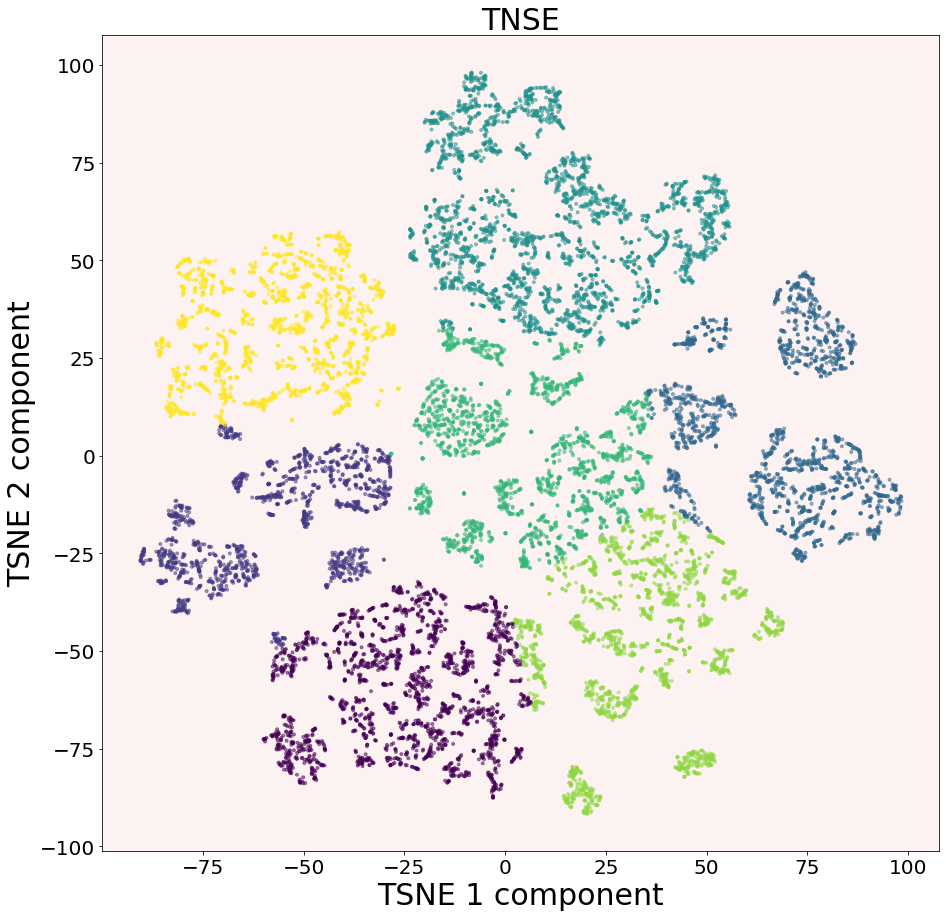

2:80: E501 line too long (83 > 79 characters)


In [27]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, c=dft.get('cluster'), marker='.')
ax.set_title("TNSE", fontsize=30)
ax.set_xlabel("TSNE 1 component", fontsize=30)
ax.set_ylabel("TSNE 2 component", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.patch.set_facecolor("lightcoral")
ax.patch.set_alpha(0.1)
plt.show()

### on regroupe par cluster

In [39]:
# dictionnaire d'aggrégation
%pycodestyle_off
dict_agg = {'number_order': 'mean',
            'meantime_purchase': 'mean',
            'meantime_delivery': 'mean',
            'total_item' : 'mean',
            'mean_price' : 'mean',
            'volume': 'mean',
            'description': 'mean',
            'total_price': 'sum',
            'review_score': 'mean',
            'art': 'sum',
            'animal': 'sum',
            'health': 'sum',
            'auto': 'sum',
            'build': 'sum',
            'computer': 'sum',
            'fashion': 'sum',
            'food': 'sum',
            'home': 'sum',
            'industry': 'sum',
            'toys': 'sum',
            'santos': 'sum',
            'rio de janeiro': 'sum',
            'bello horizonte': 'sum',
            'salvador': 'sum',
            'recife': 'sum',
            'fortaleza': 'sum',
            'brasillia': 'sum',
            'curitiba': 'sum',
            'porto alegre': 'sum'}

'''
NON UTILISE
'boleto': 'sum',
'credit_card': 'sum',
'debit_card': 'sum',
'voucher': 'sum'
'areaCust0': 'max',
'areaCust1': 'max',
'areaCust2': 'max',
'areaCust3': 'max',
'areaCust4': 'max',
'areaCust5': 'max',
'areaCust6': 'max',
'areaCust7': 'max',
'areaCust8': 'max',
'areaCust9': 'max', 
'areaSeller0': 'max',
'areaSeller1': 'max',
'areaSeller2': 'max',
'areaSeller3': 'max',
'areaSeller4': 'max',
'areaSeller5': 'max',
'areaSeller6': 'max',
'areaSeller7': 'max',
'areaSeller8': 'max',
'areaSeller9': 'max',
'''

"\nNON UTILISE\n'boleto': 'sum',\n'credit_card': 'sum',\n'debit_card': 'sum',\n'voucher': 'sum'\n'areaCust0': 'max',\n'areaCust1': 'max',\n'areaCust2': 'max',\n'areaCust3': 'max',\n'areaCust4': 'max',\n'areaCust5': 'max',\n'areaCust6': 'max',\n'areaCust7': 'max',\n'areaCust8': 'max',\n'areaCust9': 'max', \n'areaSeller0': 'max',\n'areaSeller1': 'max',\n'areaSeller2': 'max',\n'areaSeller3': 'max',\n'areaSeller4': 'max',\n'areaSeller5': 'max',\n'areaSeller6': 'max',\n'areaSeller7': 'max',\n'areaSeller8': 'max',\n'areaSeller9': 'max',\n"

In [40]:
# On groupe les clients par cluster
%pycodestyle_on
dft = dft.groupby('cluster').agg(dict_agg)

In [41]:
# Ces colonnes ne contiennet que des 0 => donc aucun intéret
del(dft['meantime_purchase'])
del(dft['food'])

In [42]:
dft

number_order  meantime_delivery  total_item  mean_price  \
cluster                                                            
0            1.000000       9.415201e+05    1.047478   81.261068   
1            1.000000       1.128435e+06    1.156398   85.228957   
2            1.001506       1.015812e+06    1.079819   96.675986   
3            1.010147       1.022028e+06    1.081172   96.202760   
4            1.071542       1.045041e+06    1.300477  108.640689   
5            1.005083       1.092561e+06    1.086404   90.320911   
6            1.003636       1.140058e+06    1.065455   86.186509   

               volume  description  total_price  review_score      art  \
cluster                                                                  
0         8951.124629     0.827323     33164.13      4.198813  2807.66   
1        15326.165877     0.824729     26486.96      4.156398     0.00   
2         9280.098645     0.833141     85435.93      4.286145     0.00   
3        18179.745209     0.822508    108983.82      4.161218     0.00   
4        14788.366720     0.800199    117065.30      4.047695   149.39   
5         6977.586616     0.806422     94260.48      4.153748     0.00   
6        23459.284848     0.831926     29755.80      4.098182     0.00   

          animal    health      auto     build  computer   fashion       home  \
cluster                                                                         
0        2882.82      0.00      0.00      0.00      0.00  27473.65       0.00   
1           0.00      0.00      0.00  26486.96      0.00      0.00       0.00   
2           0.00  84483.28      0.00      0.00      0.00      0.00       0.00   
3           0.00    200.88      0.00      0.00    620.89      0.00  108162.05   
4           0.00   2136.72      0.00    132.34   2032.94    734.82   36047.51   
5           0.00    132.45      0.00      0.00  93982.58    145.45       0.00   
6           0.00      0.00  13548.21      0.00      0.00      0.00       0.00   

         industry      toys  santos  rio de janeiro  bello horizonte  \
cluster                                                                
0            0.00      0.00    72.0            46.0             41.0   
1            0.00      0.00    47.0            42.0             23.0   
2            0.00    952.65   114.0            94.0             81.0   
3            0.00      0.00   160.0           126.0            124.0   
4          353.22  75478.36   112.0            94.0             82.0   
5            0.00      0.00   136.0           125.0             97.0   
6        16207.59      0.00    54.0            36.0             27.0   

         salvador  recife  fortaleza  brasillia  curitiba  porto alegre  
cluster                                                                  
0            12.0     6.0       11.0       20.0      39.0          13.0  
1             9.0     5.0        6.0        8.0      19.0          15.0  
2            33.0    26.0       22.0       40.0      60.0          42.0  
3            25.0    19.0       17.0       42.0      70.0          59.0  
4            27.0    10.0       35.0       34.0      45.0          43.0  
5            40.0    23.0       53.0       48.0      56.0          47.0  
6             9.0     4.0       14.0       23.0      19.0          19.0

# Analyse des clusters
### on decoupe en plusieurs parties les features:
###     - les comportements des clients
###     - leurs centres d'intérêts
###     - leurs localisations
### on présente les cluster au traver de graphiques type radars

## Comportement client

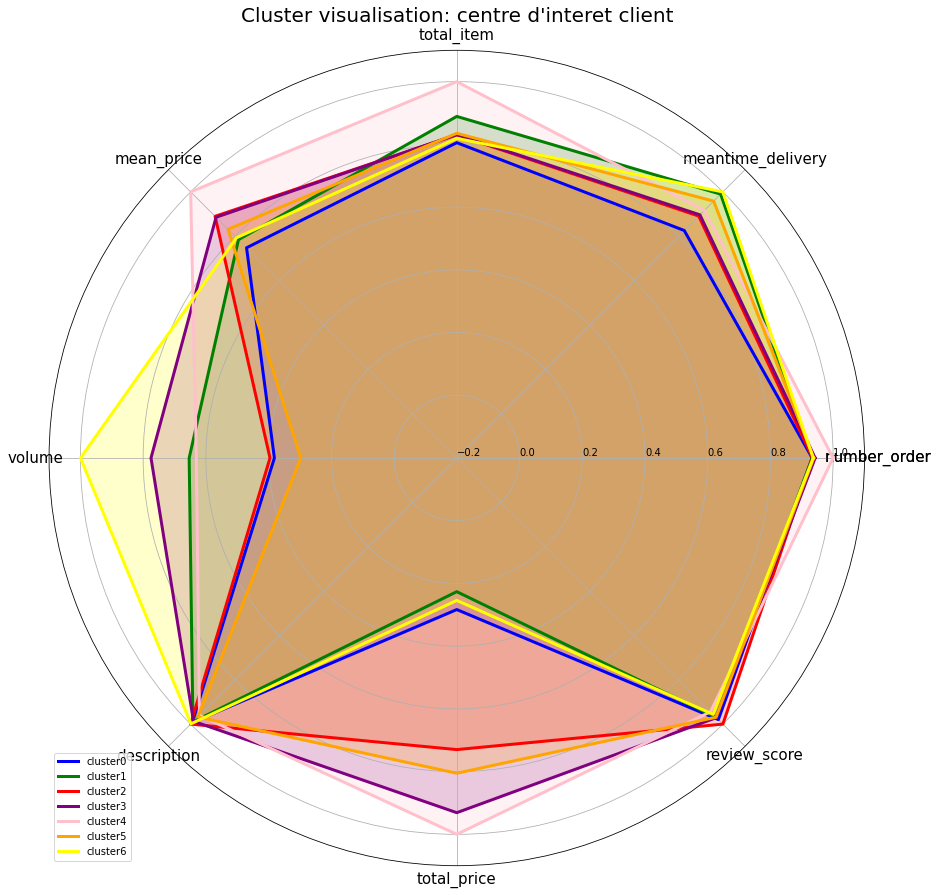

13:80: E501 line too long (90 > 79 characters)


In [43]:
color = ['blue', 'green', 'red', 'purple', 'pink', 'orange', 'yellow']

category = dft.columns.values.tolist()[0:8]
category.append(category[0])
numberCat = len(category)
theta = 2 * np.pi * np.linspace(0, 1, numberCat)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='polar', facecolor='white')
for i in range(dft.shape[0]):
    r = (dft.loc[i].values/dft.max().values).tolist()[0:8]
    r.append(r[0])
    ax.plot(theta, r, label="cluster{}".format(dft.index[i]), linewidth=3, color=color[i])
    ax.fill(theta, r, alpha=.2, color=color[i])
ax.set_rmax(1.1)
ax.set_rmin(-0.1)
ax.set_rticks(np.arange(-0.2, 1.2, 0.2))  # Less radial ticks
ax.set_xticks(theta)
ax.set_xticklabels(category, fontsize=15)
ax.set_rlabel_position(0)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title("Cluster visualisation: centre d'interet client", fontsize=20)
plt.legend()
plt.show()

### Seules les features 'mean price', 'volume', 'total price' permettent de segement les clients, le volume n'appote pas de réelle information

## Centre d'intérêt client

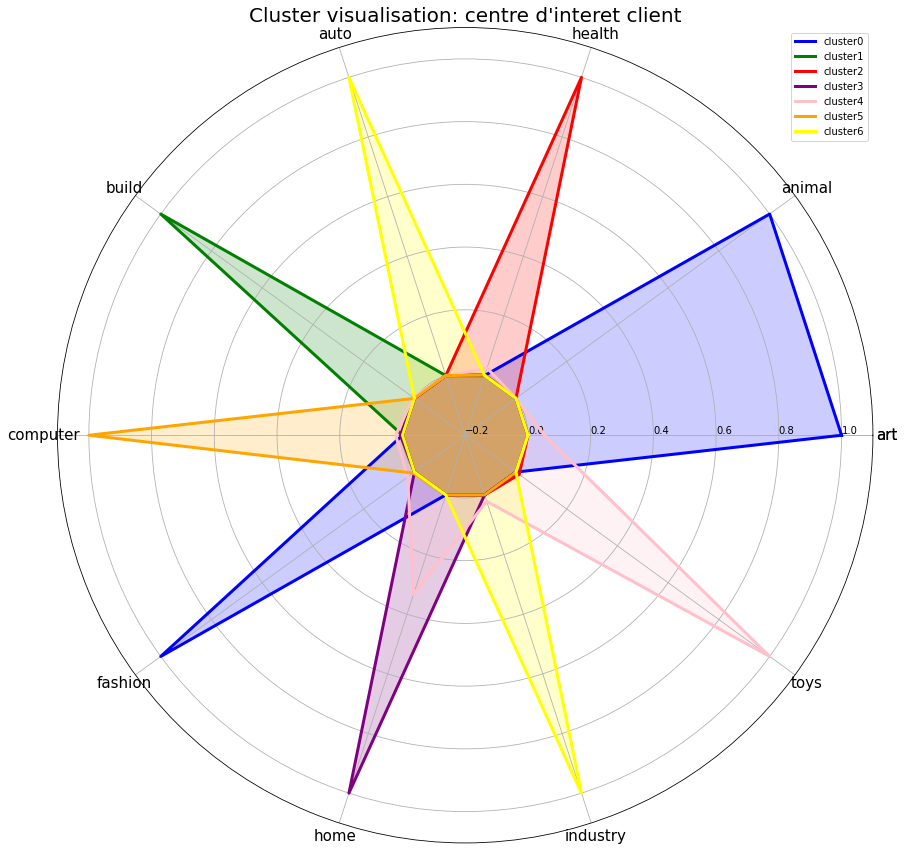

13:80: E501 line too long (90 > 79 characters)


In [46]:
color = ['blue', 'green', 'red', 'purple', 'pink', 'orange', 'yellow']

category = dft.columns.values.tolist()[8: 18]
category.append(category[0])
numberCat = len(category)
theta = 2 * np.pi * np.linspace(0, 1, numberCat)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='polar', facecolor='white')
for i in range(dft.shape[0]):
    r = (dft.loc[i].values/dft.max().values).tolist()[8: 18]
    r.append(r[0])
    ax.plot(theta, r, label="cluster{}".format(dft.index[i]), linewidth=3, color=color[i])
    ax.fill(theta, r, alpha=.2, color=color[i])
ax.set_rmax(1.1)
ax.set_rmin(-0.1)
ax.set_rticks(np.arange(-0.2, 1.2, 0.2))  # Less radial ticks
ax.set_xticks(theta)
ax.set_xticklabels(category, fontsize=15)
ax.set_rlabel_position(0)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title("Cluster visualisation: centre d'interet client", fontsize=20)
plt.legend()
plt.show()

### chacune de ces features permettent de segementer les clients 

## Localisation client

### Répartion des Cluster par villes (clients des clusters par ville)

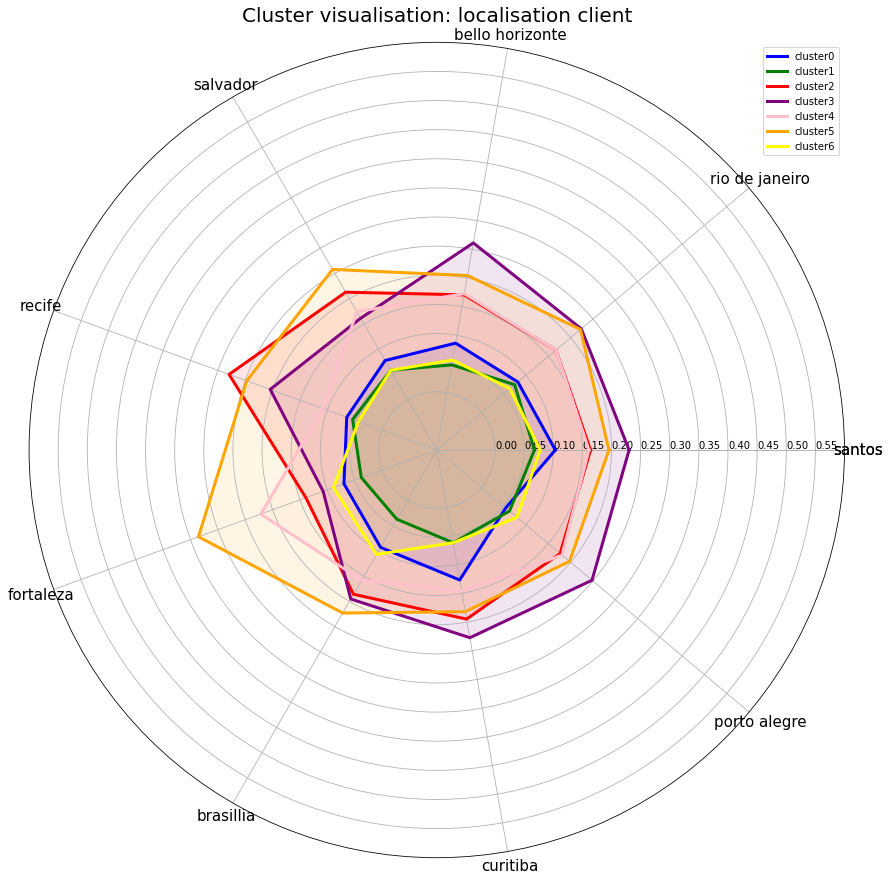

14:80: E501 line too long (90 > 79 characters)


In [47]:
color = ['blue', 'green', 'red', 'purple', 'pink', 'orange', 'yellow']

category = dft.columns.values.tolist()[18:]
category.append(category[0])
numberCat = len(category)
theta = 2 * np.pi * np.linspace(0, 1, numberCat)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='polar', facecolor='white')
for i in range(dft.shape[0]):
    # Répartion des Cluster par villes (clients d'un cluster par ville)
    r = (dft.loc[i].values/dft.sum().values).tolist()[18:]
    r.append(r[0])
    ax.plot(theta, r, label="cluster{}".format(dft.index[i]), linewidth=3, color=color[i])
    ax.fill(theta, r, alpha=0.1, color=color[i])
ax.set_rmax(0.6)
ax.set_rmin(-0.1)
ax.set_rticks(np.arange(0, 0.6, 0.05))  # Less radial ticks
ax.set_xticks(theta)
ax.set_xticklabels(category, fontsize=15)
ax.set_rlabel_position(0)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title("Cluster visualisation: localisation client", fontsize=20)
plt.legend()
plt.show()

### chacune de ces features permettent de segementer les clients 

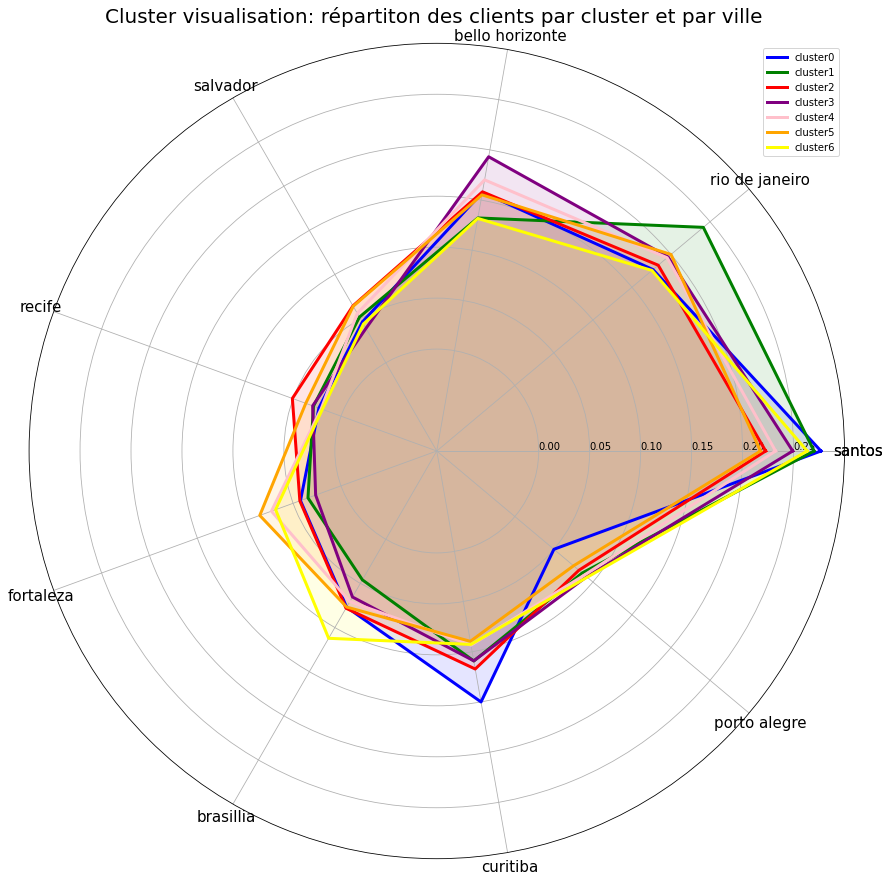

14:80: E501 line too long (90 > 79 characters)
23:80: E501 line too long (100 > 79 characters)


In [51]:
color = ['blue', 'green', 'red', 'purple', 'pink', 'orange', 'yellow']

category = dft.columns.values.tolist()[18:]
category.append(category[0])
numberCat = len(category)
theta = 2 * np.pi * np.linspace(0, 1, numberCat)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='polar', facecolor='white')
for i in range(dft.shape[0]):
    # On regarde la répartion des clients d'un cluster
    r = (dft.loc[i].values/sum(dft.iloc[i].values[18:])).tolist()[18:]
    r.append(r[0])
    ax.plot(theta, r, label="cluster{}".format(dft.index[i]), linewidth=3, color=color[i])
    ax.fill(theta, r, alpha=0.1, color=color[i])
ax.set_rmax(0.3)
ax.set_rmin(-0.1)
ax.set_rticks(np.arange(0, 0.3, 0.05))  # Less radial ticks
ax.set_xticks(theta)
ax.set_xticklabels(category, fontsize=15)
ax.set_rlabel_position(0)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title("Cluster visualisation: répartiton des clients par cluster et par ville ", fontsize=20)
plt.legend()
plt.show()

# Table de synthèse

In [56]:
dfS = pd.DataFrame(columns=['total_price',
                            'mean_price',
                            'type_of_product',
                            'best_implentation',
                            'best_implentation_%',
                            'city_population',
                            'city_population_%'])

dfS[['total_price', 'mean_price']] = dft[['total_price', 'mean_price']]

dfL = dft[['santos',
           'rio de janeiro',
           'bello horizonte',
           'salvador',
           'recife',
           'fortaleza',
           'brasillia',
           'curitiba',
           'porto alegre']]

dff = dfL.copy()
for i in range(dfL.shape[0]):
    dfL.loc[i] = (100*dff.loc[i]/dff.sum()).round()

dfM = dft[['santos',
           'rio de janeiro',
           'bello horizonte',
           'salvador',
           'recife',
           'fortaleza',
           'brasillia',
           'curitiba',
           'porto alegre']]

for i in range(dfL.shape[0]):
    dfM.loc[i] = (100*dff.loc[i]/(dff.iloc[i].sum())).round()

dfC = dft[['art',
           'animal',
           'health',
           'auto',
           'build',
           'computer',
           'fashion',
           'home',
           'industry',
           'toys']]

for i in range(dfC.shape[0]):
    liste = []
    for col in dfC:
        if dfC[col].iloc[i] != 0:
            liste.append(str(col))
    dfS['type_of_product'].iloc[i] = l

dfS = dfS.loc[dfS.index.repeat(dfM.shape[1])]
dfS = dfS.reset_index()

for i in range(dfS.shape[0])[0::9]:
    dfS['best_implentation'].iloc[i: i+9] = dfM.loc[i/9].sort_values(ascending=False).index.tolist()
    dfS['best_implentation_%'].iloc[i: i+9] = dfM.loc[i/9].sort_values(ascending=False).tolist()
    dfS['city_population'].iloc[i: i+9] = dfL.loc[i/9].sort_values(ascending=False).index.tolist()
    dfS['city_population_%'].iloc[i: i+9] = dfL.loc[i/9].sort_values(ascending=False).tolist()

dfS

/home/sylvain/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/sylvain/.local/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


cluster  total_price  mean_price   type_of_product best_implentation  \
0         0     33164.13   81.261068  [auto, industry]            santos   
1         0     33164.13   81.261068  [auto, industry]    rio de janeiro   
2         0     33164.13   81.261068  [auto, industry]   bello horizonte   
3         0     33164.13   81.261068  [auto, industry]          curitiba   
4         0     33164.13   81.261068  [auto, industry]         brasillia   
5         0     33164.13   81.261068  [auto, industry]          salvador   
6         0     33164.13   81.261068  [auto, industry]      porto alegre   
7         0     33164.13   81.261068  [auto, industry]         fortaleza   
8         0     33164.13   81.261068  [auto, industry]            recife   
9         1     26486.96   85.228957  [auto, industry]            santos   
10        1     26486.96   85.228957  [auto, industry]    rio de janeiro   
11        1     26486.96   85.228957  [auto, industry]   bello horizonte   
12        1     26486.96   85.228957  [auto, industry]          curitiba   
13        1     26486.96   85.228957  [auto, industry]      porto alegre   
14        1     26486.96   85.228957  [auto, industry]          salvador   
15        1     26486.96   85.228957  [auto, industry]         brasillia   
16        1     26486.96   85.228957  [auto, industry]            recife   
17        1     26486.96   85.228957  [auto, industry]         fortaleza   
18        2     85435.93   96.675986  [auto, industry]            santos   
19        2     85435.93   96.675986  [auto, industry]    rio de janeiro   
20        2     85435.93   96.675986  [auto, industry]   bello horizonte   
21        2     85435.93   96.675986  [auto, industry]          curitiba   
22        2     85435.93   96.675986  [auto, industry]         brasillia   
23        2     85435.93   96.675986  [auto, industry]      porto alegre   
24        2     85435.93   96.675986  [auto, industry]          salvador   
25        2     85435.93   96.675986  [auto, industry]            recife   
26        2     85435.93   96.675986  [auto, industry]         fortaleza   
27        3    108983.82   96.202760  [auto, industry]            santos   
28        3    108983.82   96.202760  [auto, industry]    rio de janeiro   
29        3    108983.82   96.202760  [auto, industry]   bello horizonte   
30        3    108983.82   96.202760  [auto, industry]          curitiba   
31        3    108983.82   96.202760  [auto, industry]      porto alegre   
32        3    108983.82   96.202760  [auto, industry]         brasillia   
33        3    108983.82   96.202760  [auto, industry]          salvador   
34        3    108983.82   96.202760  [auto, industry]            recife   
35        3    108983.82   96.202760  [auto, industry]         fortaleza   
36        4    117065.30  108.640689  [auto, industry]            santos   
37        4    117065.30  108.640689  [auto, industry]    rio de janeiro   
38        4    117065.30  108.640689  [auto, industry]   bello horizonte   
39        4    117065.30  108.640689  [auto, industry]          curitiba   
40        4    117065.30  108.640689  [auto, industry]      porto alegre   
41        4    117065.30  108.640689  [auto, industry]         fortaleza   
42        4    117065.30  108.640689  [auto, industry]         brasillia   
43        4    117065.30  108.640689  [auto, industry]          salvador   
44        4    117065.30  108.640689  [auto, industry]            recife   
45        5     94260.48   90.320911  [auto, industry]            santos   
46        5     94260.48   90.320911  [auto, industry]    rio de janeiro   
47        5     94260.48   90.320911  [auto, industry]   bello horizonte   
48        5     94260.48   90.320911  [auto, industry]          curitiba   
49        5     94260.48   90.320911  [auto, industry]         fortaleza   
50        5     94260.48   90.320911  [auto, industry]         brasillia   
51        5     94260.48   90.320911  [auto, industr

60:80: E501 line too long (100 > 79 characters)
61:80: E501 line too long (96 > 79 characters)
62:80: E501 line too long (98 > 79 characters)
63:80: E501 line too long (94 > 79 characters)


# Maintenance

### On spit le jeu de données puis on créé deux algos Kmean, l'un sera mis a jour au fur et a mesure que le jeu donnée grandit, le second ne sera pas mis a jour. On va ensuite comparer leur score de silhouette de manière a observer a partir de combien de mise a jour on observe une divergnce entre les 2 modèles.

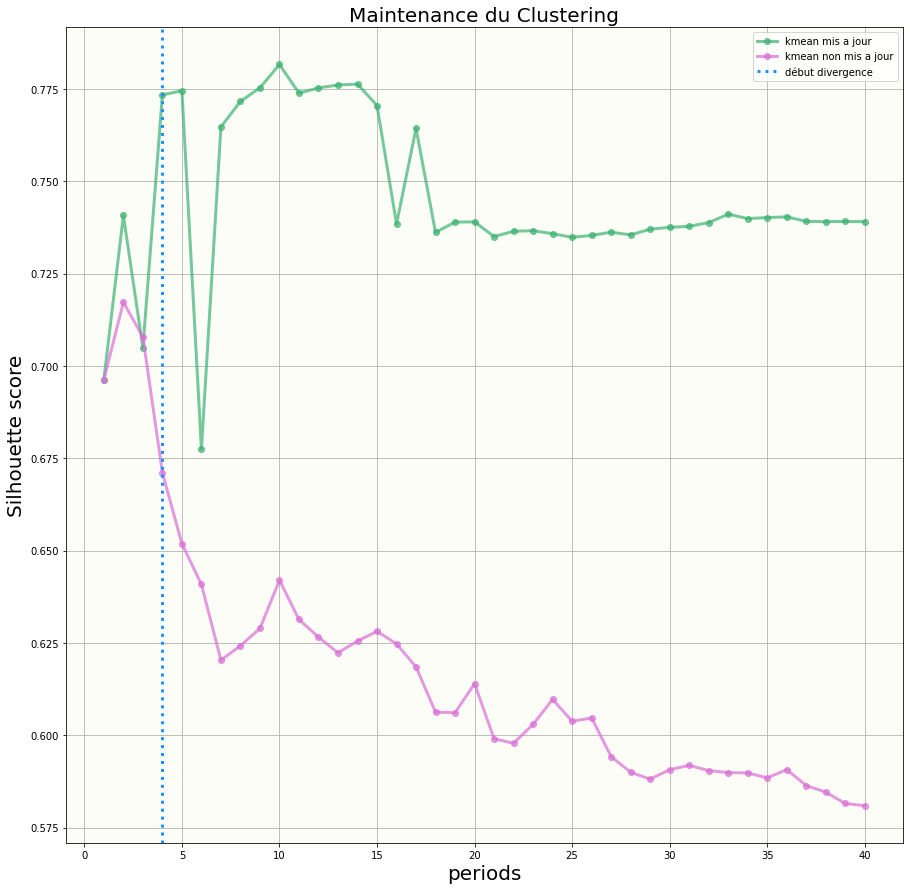

In [56]:
# Liste pour Score de Silhouette
kmeanScoreUp = []
kmeanScore = []

# on split le jeux de donnée.
sep = 40
limit = X_tsne.shape[0] % sep
if limit == 0:
    X = X_tsne
else:
    X = X_tsne[:-limit, :]

x = np.linspace(1, sep, sep)

for split in np.vsplit(X, sep):

    if not kmeanScore:

        # Initial clsuter
        s = split
        kmeanUp = KMeans(n_clusters=7, random_state=0, n_init=10).fit(s)
        kmeanScoreUp.append(silhouette_score(s, kmeanUp.labels_))
        kmean = KMeans(n_clusters=7, random_state=0, n_init=10).fit(s)
        kmeanScore.append(silhouette_score(s, kmean.labels_))

    else:

        s = np.vstack([s, split])
        kmeanUp = KMeans(n_clusters=7, random_state=0, n_init=10).fit(s)
        kmeanScoreUp.append(silhouette_score(s, kmeanUp.labels_))

        # Cluster not update
        kmeanScore.append(silhouette_score(s, kmean.predict(s)))
    
# Affichage
# On affiche les scores
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(x, kmeanScoreUp, label="kmean mis a jour", color='mediumseagreen', alpha=0.7, linewidth=3, marker='o')
ax.plot(x, kmeanScore, color='orchid', alpha=0.7, linewidth=3, label="kmean non mis a jour", marker='o')
ax.axvline(x=4, linestyle=':', color='dodgerblue', linewidth=3, label="début divergence")
ax.set_xlabel("periods", fontsize=20)
ax.set_ylabel('Silhouette score', fontsize=20)
ax.patch.set_facecolor("beige")
ax.patch.set_alpha(0.2)
ax.set_title('Maintenance du Clustering',  fontsize=20)
plt.legend()
plt.grid()
plt.show()